# Luxembourg Economic Statistics

## National consumer price index (NCPI), base 100 in 2015


--- Annual Inflation Rates ---
Year 1996: 1.19%
Year 1997: 1.37%
Year 1998: 0.96%
Year 1999: 1.02%
Year 2000: 3.15%
Year 2001: 2.66%
Year 2002: 2.07%
Year 2003: 2.06%
Year 2004: 2.22%
Year 2005: 2.50%
Year 2006: 2.67%
Year 2007: 2.31%
Year 2008: 3.40%
Year 2009: 0.37%
Year 2010: 2.28%
Year 2011: 3.41%
Year 2012: 2.66%
Year 2013: 1.74%
Year 2014: 0.63%
Year 2015: 0.47%
Year 2016: 0.29%
Year 2017: 1.73%
Year 2018: 1.53%
Year 2019: 1.74%
Year 2020: 0.83%
Year 2021: 2.52%
Year 2022: 6.33%
Year 2023: 3.75%
Year 2024: 2.05%


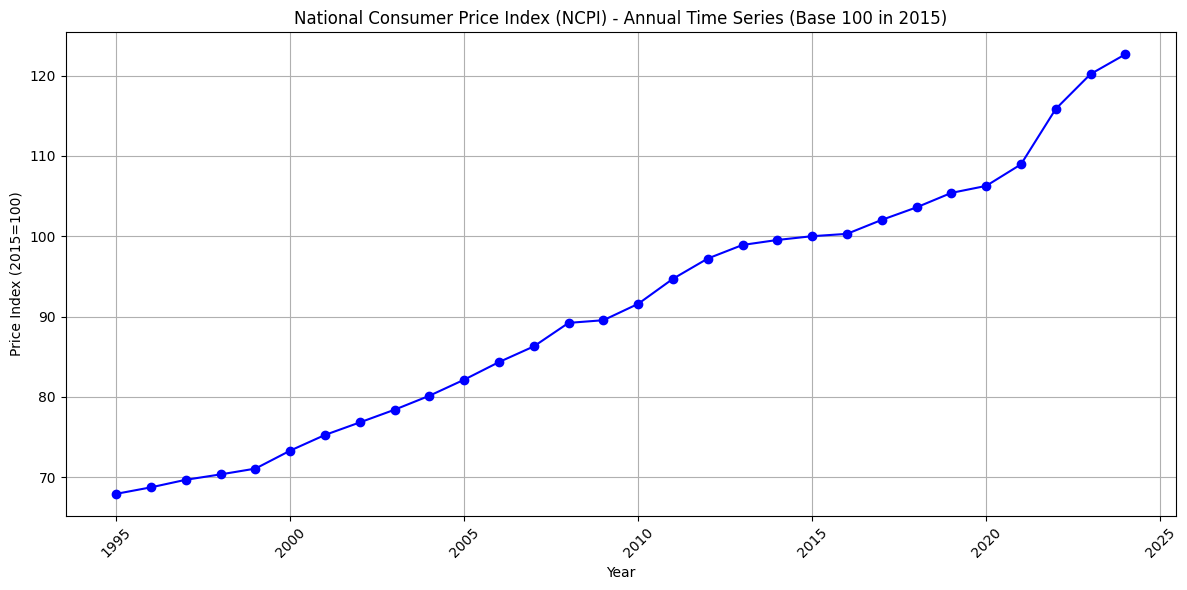

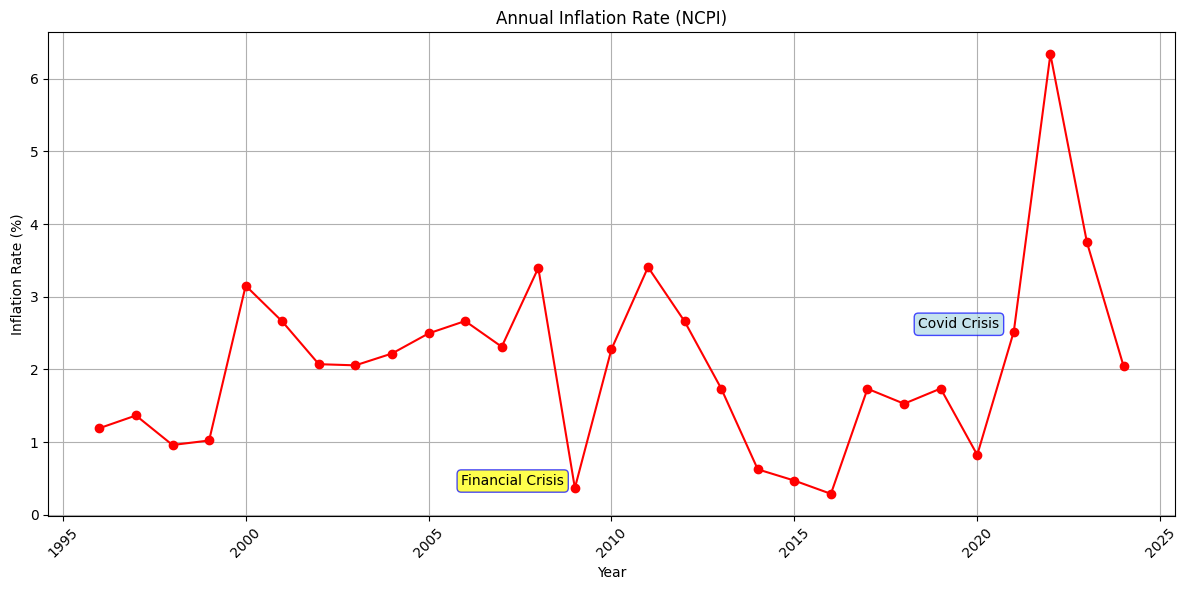

In [24]:
import csv
import matplotlib.pyplot as plt
import os

# Define the path to your CSV file
csv_file_path = '../data/LU1,DSD_PRIX_CONSO@DF_E5106,1.0+all.csv'

# Initialize lists to store the parsed data
annual_time_periods = []
annual_obs_values = []

# Check if the CSV file exists before attempting to read it
if not os.path.exists(csv_file_path):
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please make sure 'dataset.csv' is in the same directory as your Jupyter notebook,")
    print("or provide the full path to the file.")
else:
    try:
        with open(csv_file_path, mode='r', newline='', encoding='utf-8') as file:
            csv_reader = csv.reader(file)

            # Read the header row
            header = next(csv_reader)

            # Find the indices of the required columns
            try:
                freq_idx = header.index('FREQ')
                time_period_idx = header.index('TIME_PERIOD')
                obs_value_idx = header.index('OBS_VALUE')
            except ValueError as e:
                print(f"Error: Missing expected column in CSV header: {e}")
                print(f"Header found: {header}")
                exit() # Exit if essential columns are not found

            # Iterate over each row in the CSV file
            for i, row in enumerate(csv_reader):
                # Skip empty rows
                if not row:
                    continue

                # Ensure row has enough columns to avoid IndexError
                if len(row) <= max(freq_idx, time_period_idx, obs_value_idx):
                    print(f"Warning: Skipping malformed row {i+2} (not enough columns): {row}")
                    continue

                frequency = row[freq_idx]
                time_period_str = row[time_period_idx]
                obs_value_str = row[obs_value_idx]

                # Filter for annual data ('A')
                if frequency == 'A':
                    try:
                        # Extract the year from TIME_PERIOD (e.g., '1995' from '1995')
                        # For annual data, TIME_PERIOD should just be the year.
                        year = int(time_period_str)
                        value = float(obs_value_str)

                        annual_time_periods.append(year)
                        annual_obs_values.append(value)
                    except ValueError:
                        print(f"Warning: Skipping row {i+2} due to invalid TIME_PERIOD or OBS_VALUE format: {row}")
                        continue

        # Check if any annual data was found
        if not annual_time_periods:
            print("No annual data found in the CSV file to plot.")
        else:
            # Sort the data by time period (year)
            # Combine into a list of tuples for easy sorting
            sorted_data = sorted(zip(annual_time_periods, annual_obs_values))
            sorted_years = [item[0] for item in sorted_data]
            sorted_values = [item[1] for item in sorted_data]

            # --- New code for calculating annual inflation rate ---
            annual_inflation_rates = []
            print("\n--- Annual Inflation Rates ---")
            # Calculate inflation from the second year onwards
            for i in range(1, len(sorted_values)):
                current_year = sorted_years[i]
                current_index = sorted_values[i]
                previous_index = sorted_values[i-1]

                if previous_index != 0: # Avoid division by zero
                    inflation_rate = ((current_index - previous_index) / previous_index) * 100
                    annual_inflation_rates.append((current_year, inflation_rate))
                    print(f"Year {current_year}: {inflation_rate:.2f}%")
                else:
                    print(f"Year {current_year}: Cannot calculate inflation (previous index is zero).")
            # --- End of new code ---

            # Plotting the time series of the Price Index
            plt.figure(figsize=(12, 6))
            plt.plot(sorted_years, sorted_values, marker='o', linestyle='-', color='blue')

            plt.title('National Consumer Price Index (NCPI) - Annual Time Series (Base 100 in 2015)')
            plt.xlabel('Year')
            plt.ylabel('Price Index (2015=100)')
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # --- New code for plotting annual inflation rate ---
            if annual_inflation_rates:
                inflation_years = [item[0] for item in annual_inflation_rates]
                inflation_values = [item[1] for item in annual_inflation_rates]

                plt.figure(figsize=(12, 6))
                plt.plot(inflation_years, inflation_values, marker='o', linestyle='-', color='red')

                plt.title('Annual Inflation Rate (NCPI)')
                plt.xlabel('Year')
                plt.ylabel('Inflation Rate (%)')
                plt.grid(True)
                plt.xticks(rotation=45)


                # Add the 'financial crisis' annotation
                # Find the inflation rate for 2009
                inflation_2009 = None
                for year, rate in annual_inflation_rates:
                    if year == 2009:
                        inflation_2009 = rate
                        break

                if inflation_2009 is not None:
                    plt.annotate(
                        'Financial Crisis',
                        xy=(2009, inflation_2009),
                        xytext=(2009 - 1.7, inflation_2009 ), # Offset text slightly for readability
                        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=1, alpha=0.7),
                        ha='center', va='bottom'
                    )
                else:
                    print("Inflation data for 2009 not found, cannot add annotation.")

                # Add the 'covid crisis' annotation for 2020
                inflation_2020 = None
                for year, rate in annual_inflation_rates:
                    if year == 2020:
                        inflation_2020 = rate
                        break

                if inflation_2020 is not None:
                    plt.annotate(
                        'Covid Crisis',
                        xy=(2020, inflation_2020),
                        xytext=(2020 - 0.5, inflation_2020 + 1.7 ), # Offset text slightly for readability
                        bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="b", lw=1, alpha=0.7),
                        ha='center', va='bottom'
                    )
                else:
                    print("Inflation data for 2020 not found, cannot add annotation.")
                
                
                plt.tight_layout()
                plt.show()
            else:
                print("\nNot enough data to plot annual inflation rates.")
            # --- End of new plotting code ---

    except Exception as e:
        print(f"An error occurred while processing the CSV file: {e}")


## Main Aggregates: three approaches(chain-linked volumes; 2015)

CSV file loaded successfully!


--- Cleaned Data Info ---
Total rows after cleaning: 1936

--- List of Variables in the CSV File ---
- Exports of goods (incld exports of gold) (TRP61)
- Exports of goods and services (P6)
- Exports of services (incld Cetr) (TRP62)
- F. C. E., General Government (Cpub)
- F. C. E., individual Households (Cnat)
- F. C. E., individual NPISH (ISBLSM)
- Final consumption expenditure (P3)
- Gross capital formation (P5)
- Gross domestic product at market prices (B1*G)
- Gross value added (B1G)
- Imports of goods (incld imports of gold - cif/fob) (TRP71)
- Imports of goods and services (P7)
- Imports of services (incld Clux + cif/fob) (TRP72)
- Intermediate consumption (P2)
- Output (P1)
- Taxes on products - Subsidies on products (D21-D31)

--- Generating Plots for Each Variable ---
Plot saved for 'Exports of goods (incld exports of gold) (TRP61)' as graphs/Exports_of_goods_incld_exports_of_gold_TRP61.png


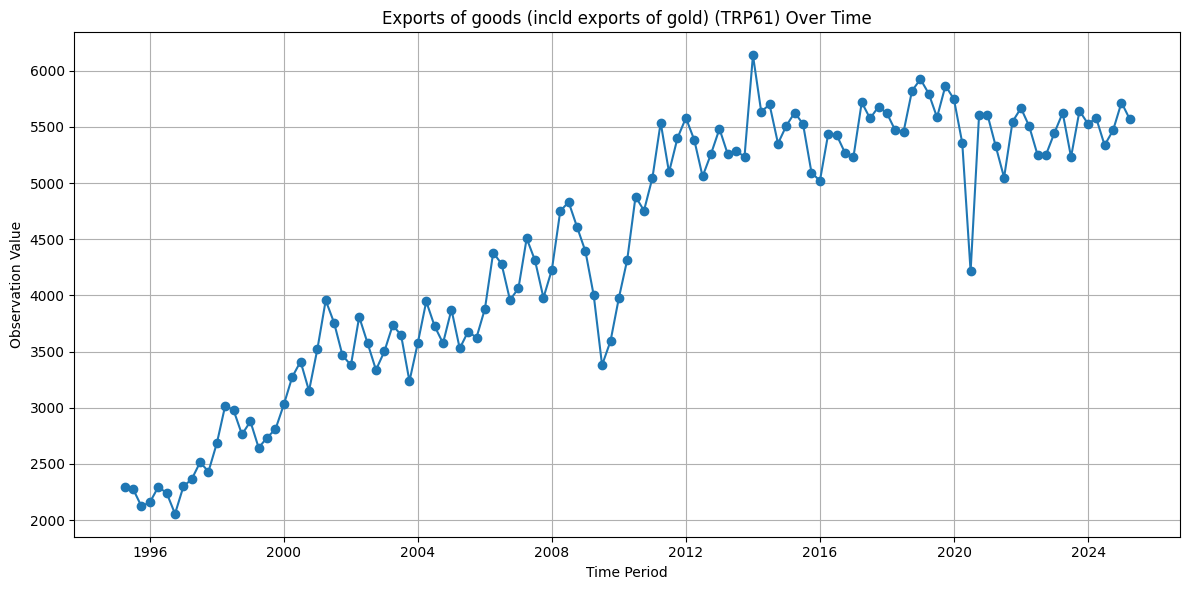

Plot saved for 'Exports of goods and services (P6)' as graphs/Exports_of_goods_and_services_P6.png


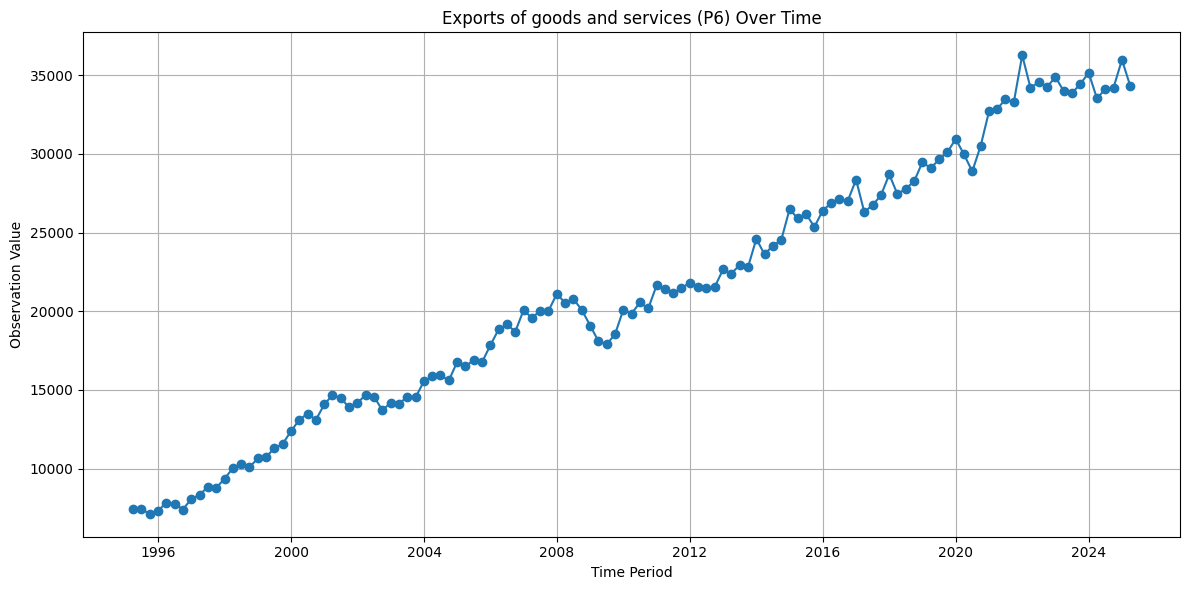

Plot saved for 'Exports of services (incld Cetr) (TRP62)' as graphs/Exports_of_services_incld_Cetr_TRP62.png


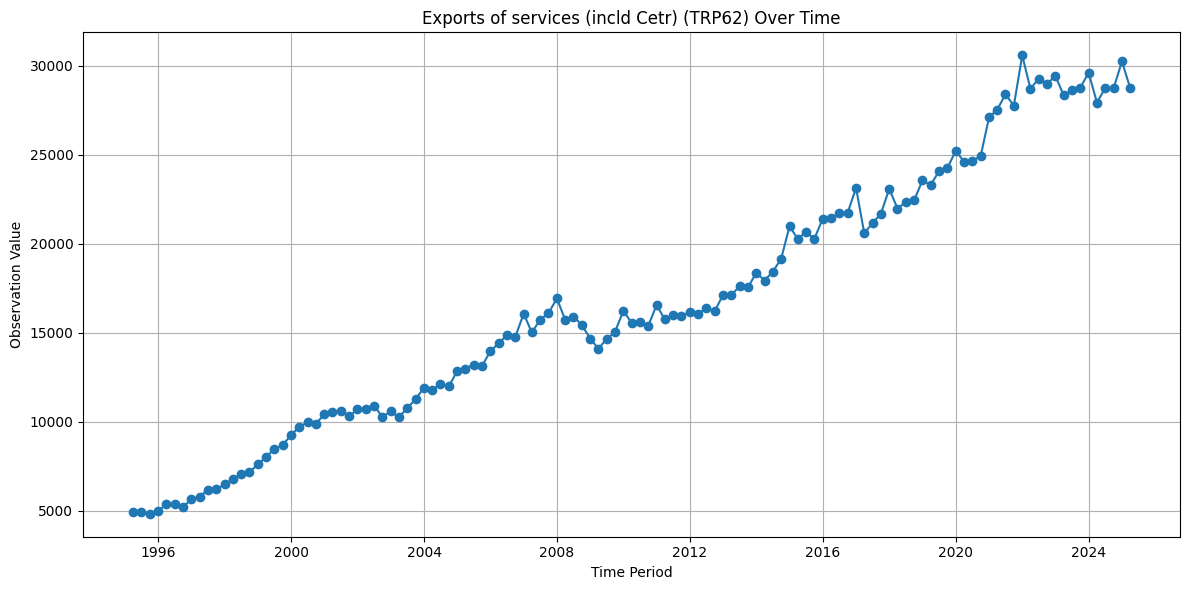

Plot saved for 'F. C. E., General Government (Cpub)' as graphs/F_C_E_General_Government_Cpub.png


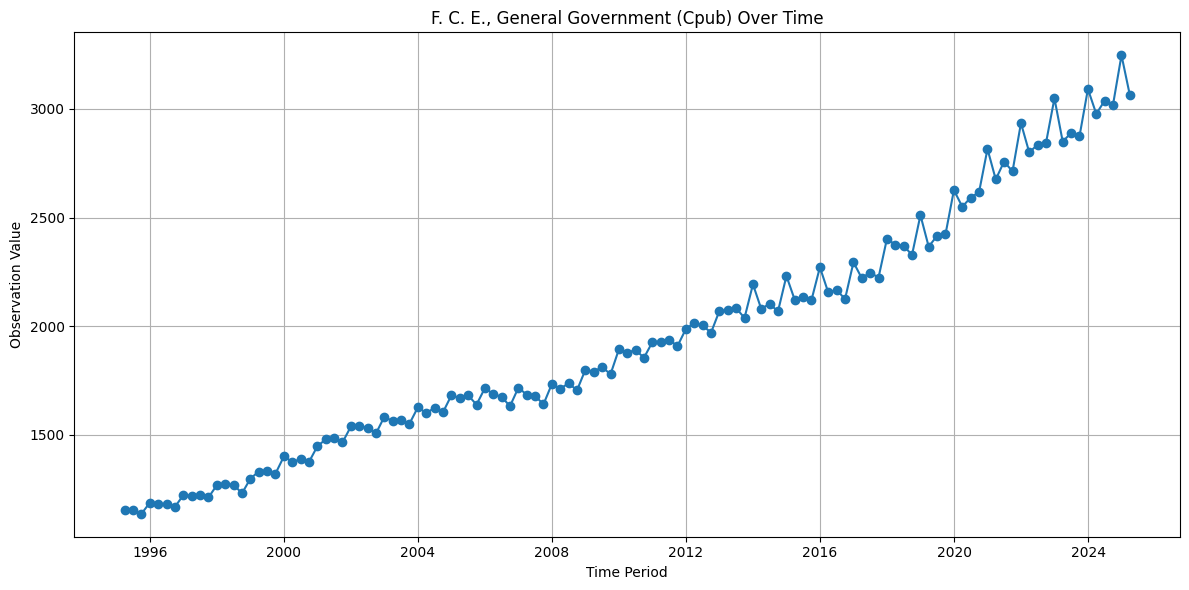

Plot saved for 'F. C. E., individual Households (Cnat)' as graphs/F_C_E_individual_Households_Cnat.png


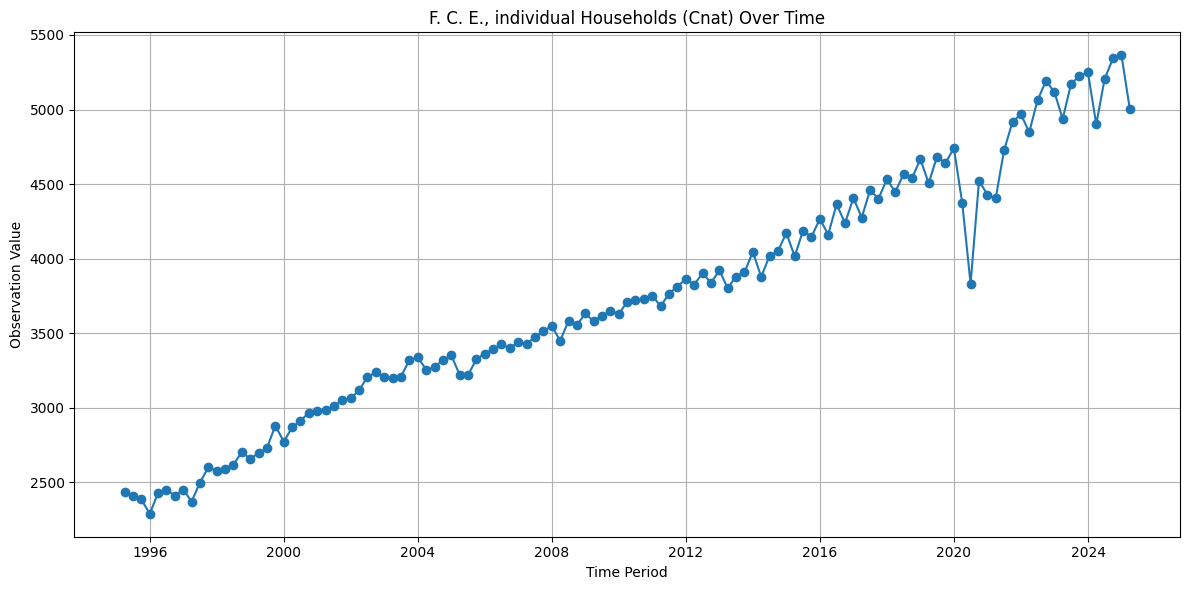

Plot saved for 'F. C. E., individual NPISH (ISBLSM)' as graphs/F_C_E_individual_NPISH_ISBLSM.png


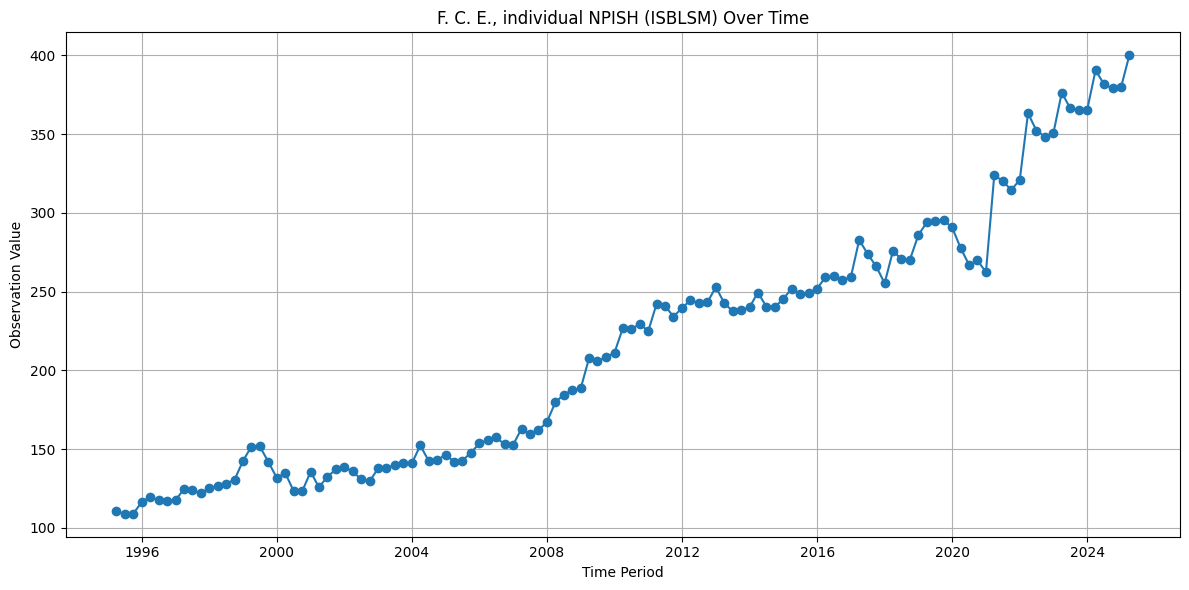

Plot saved for 'Final consumption expenditure (P3)' as graphs/Final_consumption_expenditure_P3.png


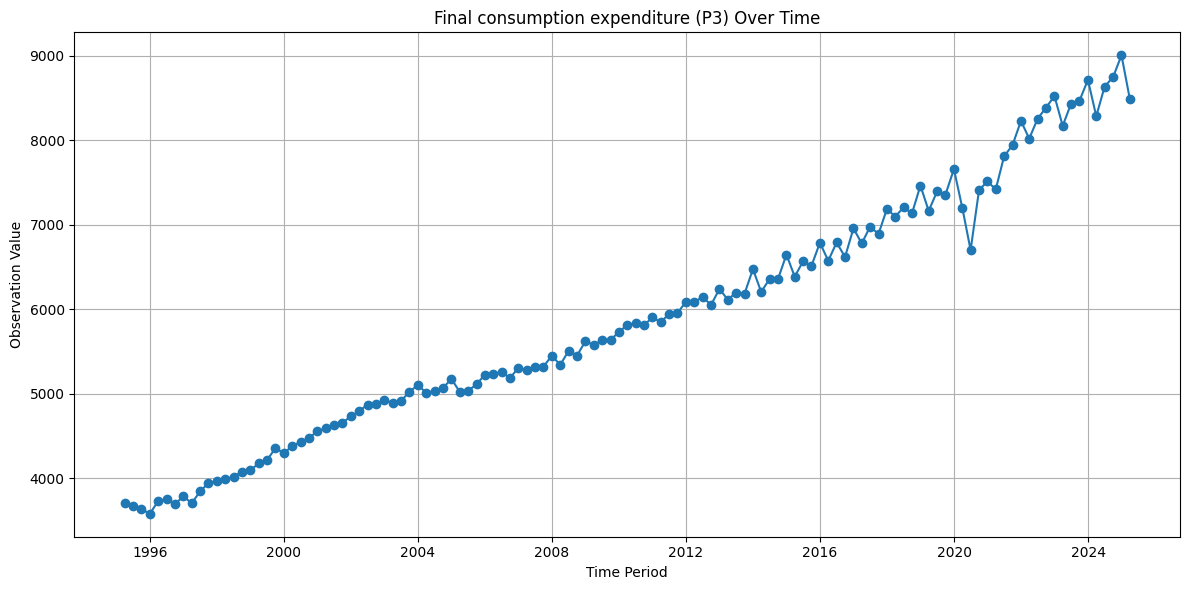

Plot saved for 'Gross capital formation (P5)' as graphs/Gross_capital_formation_P5.png


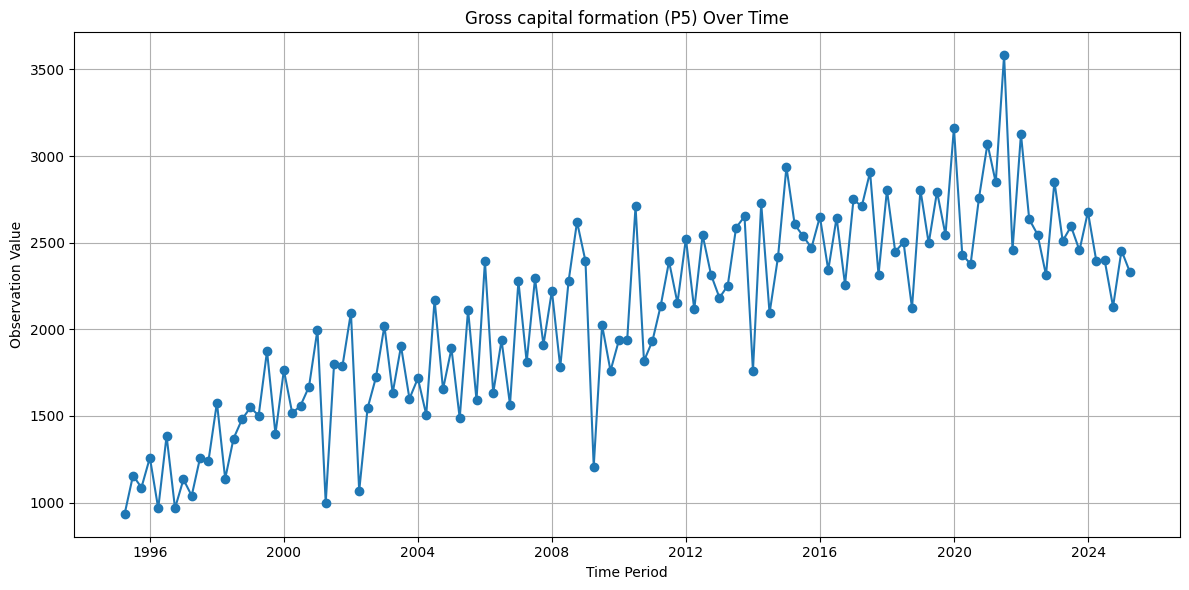

Plot saved for 'Gross domestic product at market prices (B1*G)' as graphs/Gross_domestic_product_at_market_prices_B1G.png


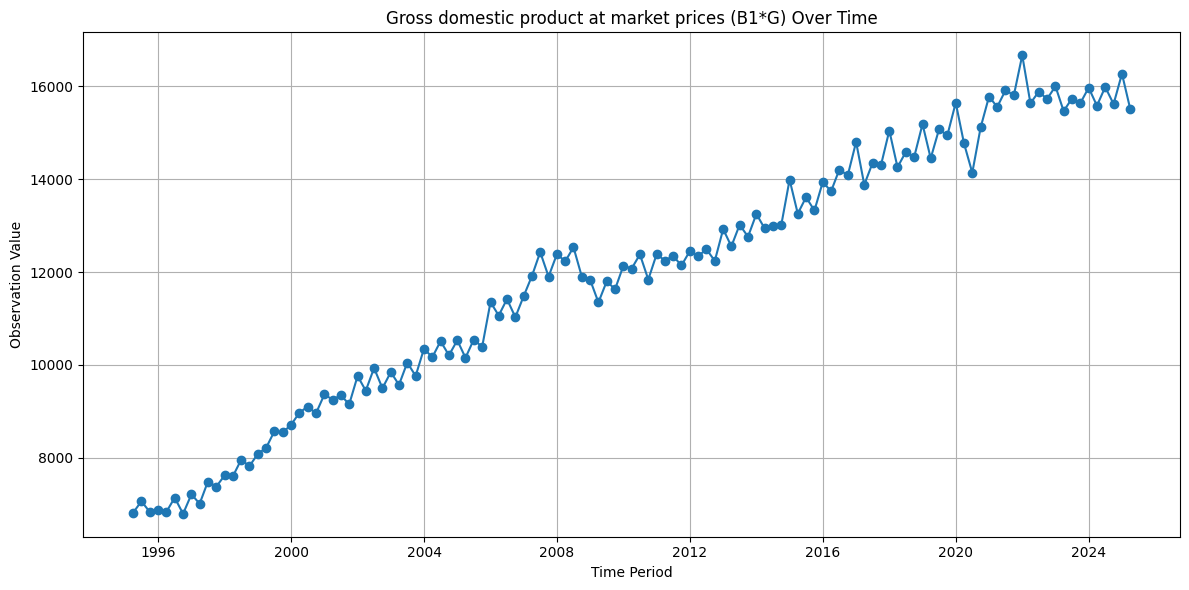

Plot saved for 'Gross value added (B1G)' as graphs/Gross_value_added_B1G.png


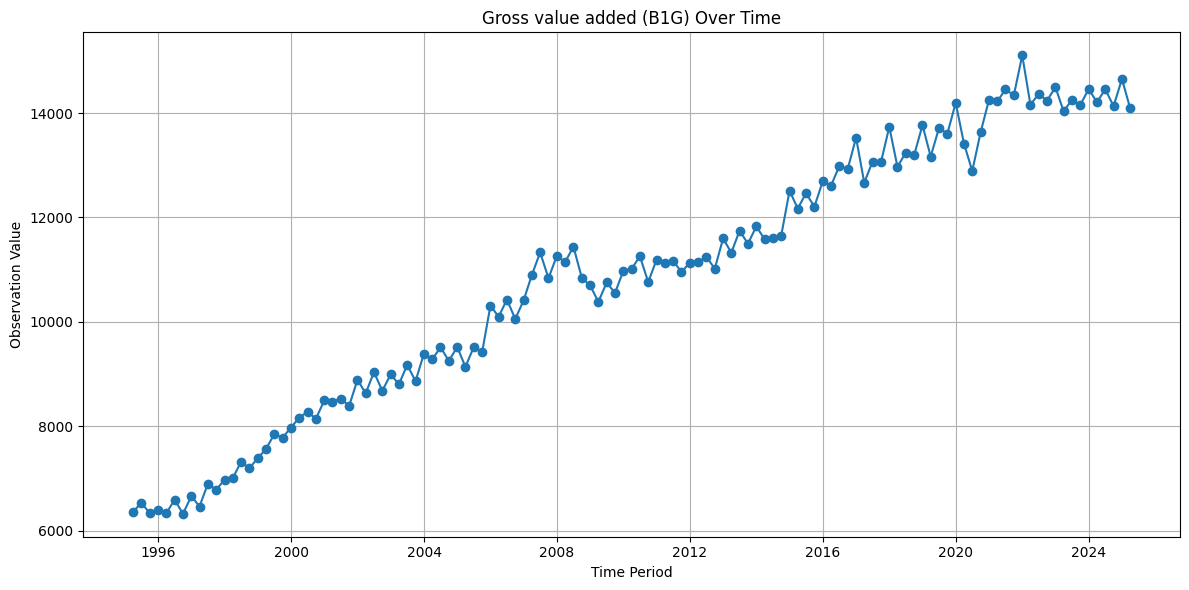

Plot saved for 'Imports of goods (incld imports of gold - cif/fob) (TRP71)' as graphs/Imports_of_goods_incld_imports_of_gold_-_ciffob_TRP71.png


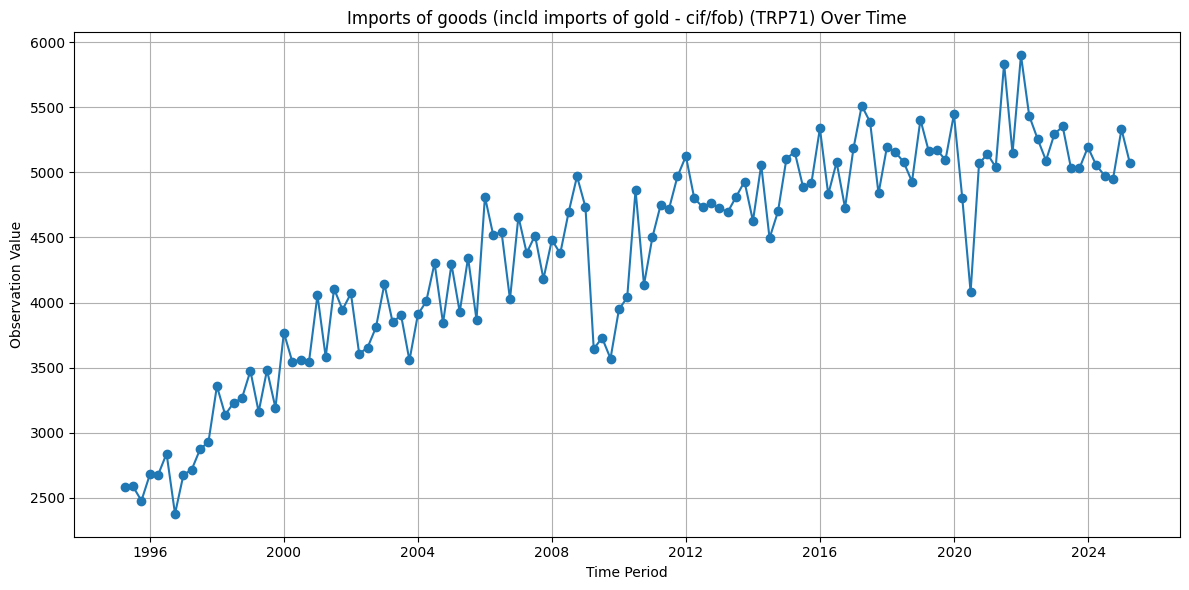

Plot saved for 'Imports of goods and services (P7)' as graphs/Imports_of_goods_and_services_P7.png


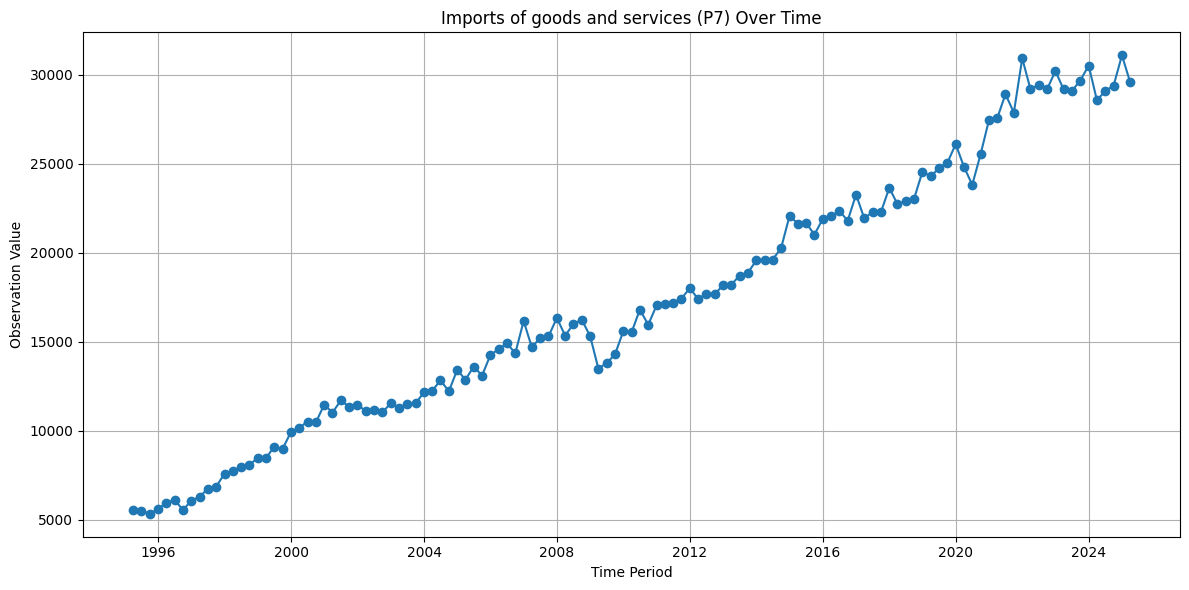

Plot saved for 'Imports of services (incld Clux + cif/fob) (TRP72)' as graphs/Imports_of_services_incld_Clux__ciffob_TRP72.png


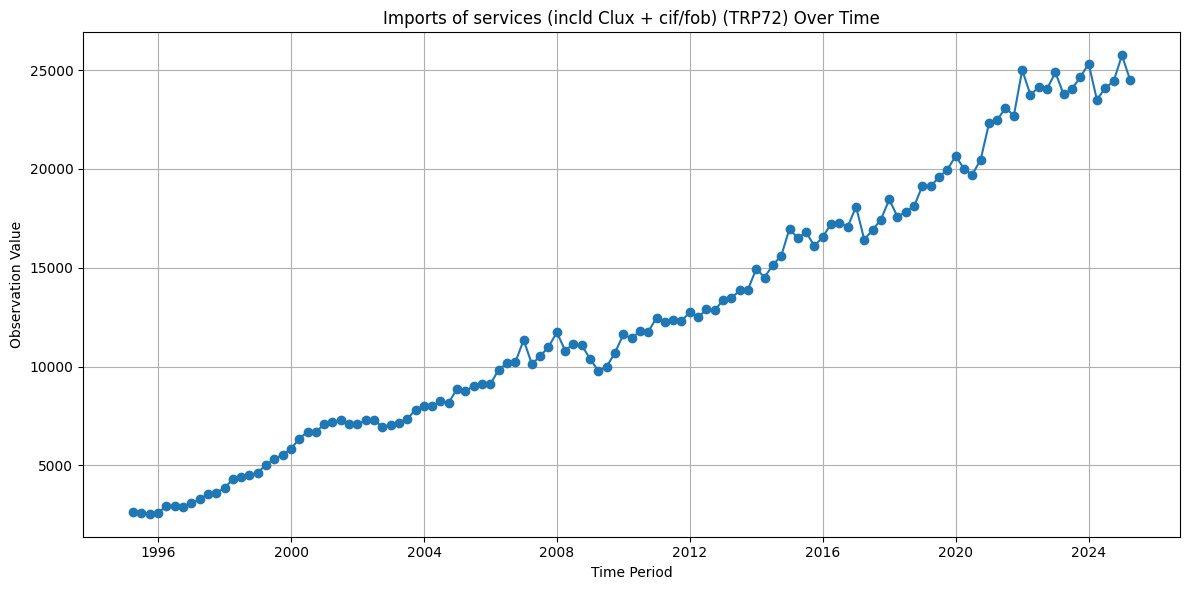

Plot saved for 'Intermediate consumption (P2)' as graphs/Intermediate_consumption_P2.png


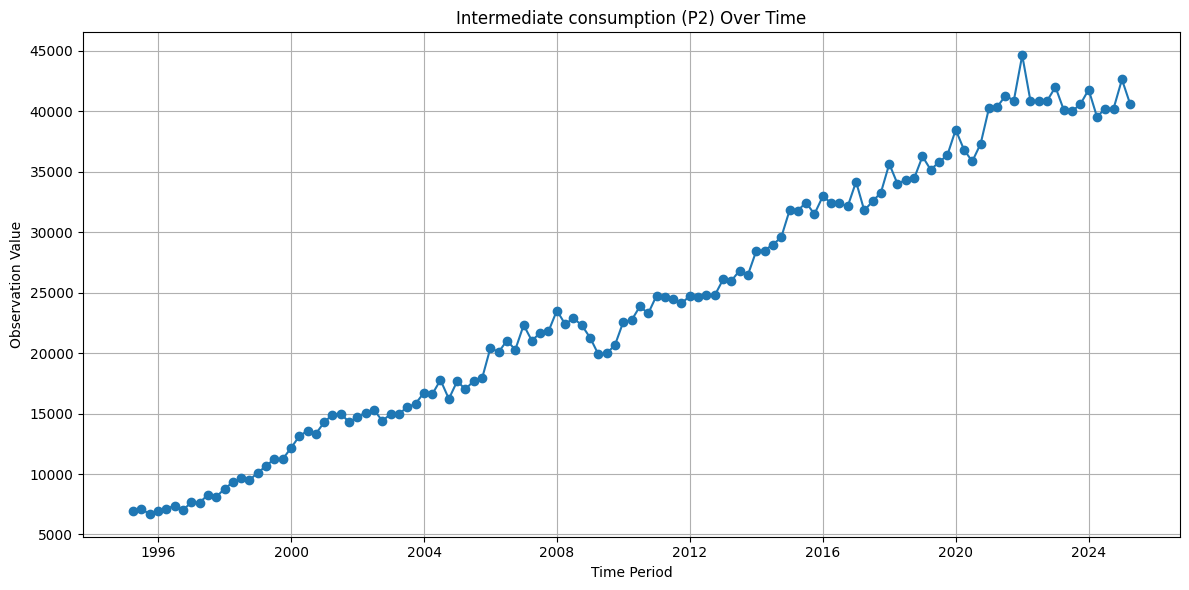

Plot saved for 'Output (P1)' as graphs/Output_P1.png


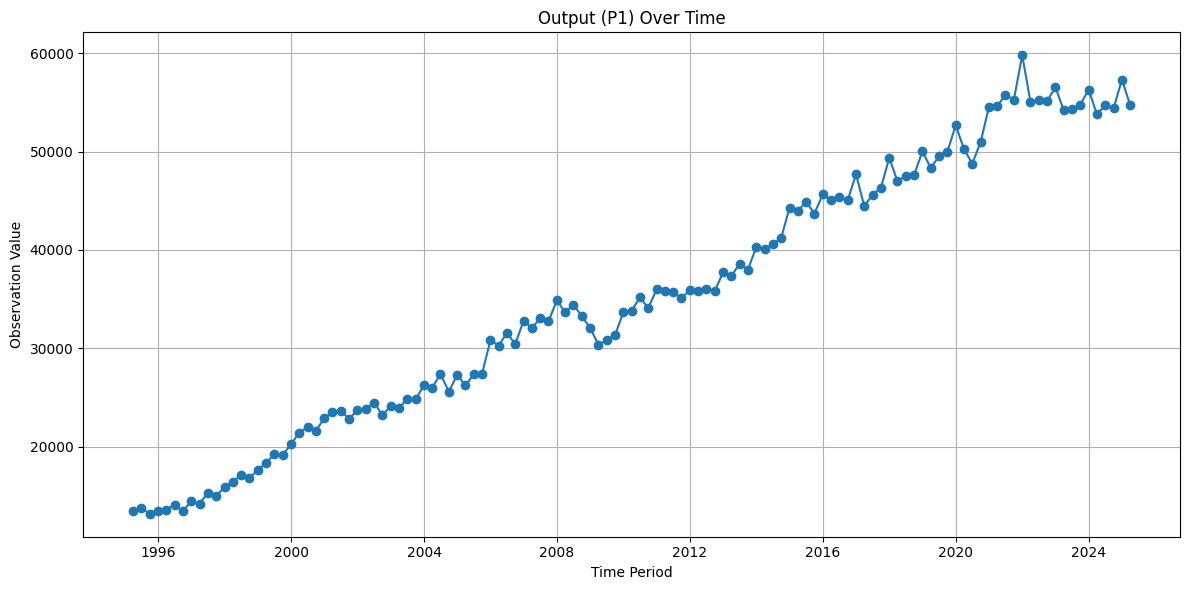

Plot saved for 'Taxes on products - Subsidies on products (D21-D31)' as graphs/Taxes_on_products_-_Subsidies_on_products_D21-D31.png


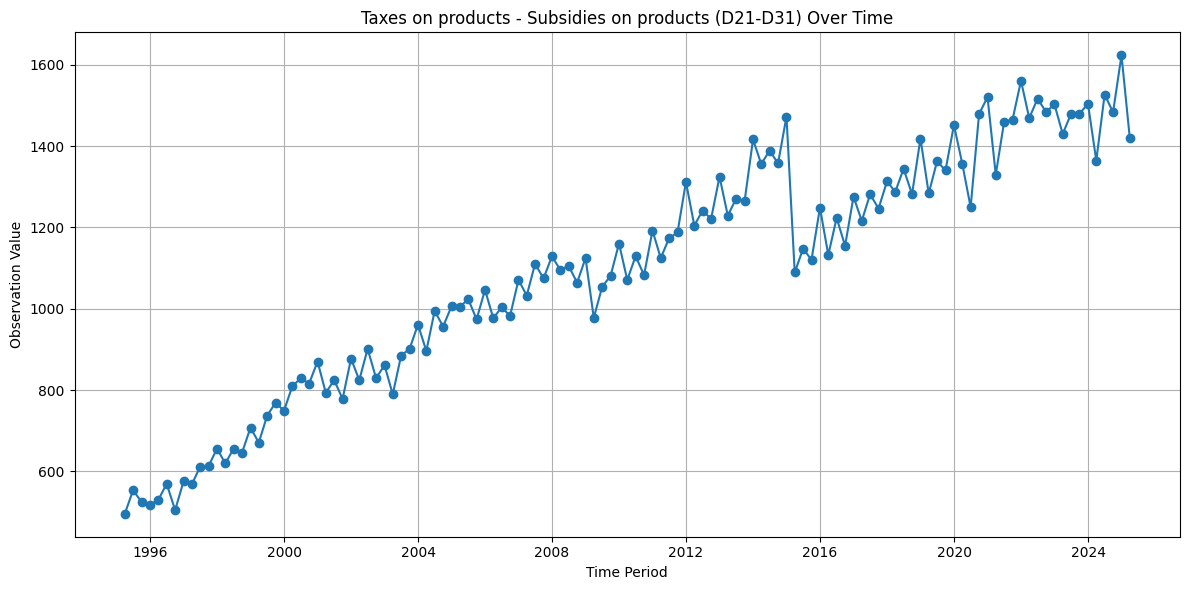


Data processing and plotting complete.


In [15]:
import csv
import matplotlib.pyplot as plt
import os
from datetime import datetime
import re # Import regex module for sanitizing filenames

# Define the path to your CSV file
# Make sure testdata.csv is in the same directory as this script, or provide the full path
#csv_file_path = 'testdata.csv'
csv_file_path = '../data/LU1,DF_E2501,1.0+all.csv'

# --- Data Import and Initial Inspection ---

def load_and_inspect_data_no_pandas(path):
    """
    Loads a CSV file into a list of dictionaries and displays initial information.

    Args:
        path (str): The file path to the CSV.

    Returns:
        list: A list of dictionaries, where each dictionary is a row.
    """
    if not os.path.exists(path):
        print(f"Error: The file '{path}' does not exist.")
        return None

    data = []
    try:
        with open(path, mode='r', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                data.append(row)
        print("CSV file loaded successfully!\n")

        # --- Data Head and Info (Optional, can be commented out for cleaner output) ---
        # print("--- Data Head (first 5 rows) ---")
        # for i, row in enumerate(data[:5]):
        #     print(row)
        #
        # print("\n--- Data Info (Column types and non-null counts) ---")
        # if not data:
        #     print("No data to display info for.")
        #     return []
        #
        # headers = data[0].keys() if data else []
        # column_info = {header: {'count': 0, 'sample_values': set()} for header in headers}
        #
        # for row in data:
        #     for header in headers:
        #         if row.get(header) not in ['', None]:
        #             column_info[header]['count'] += 1
        #         if len(column_info[header]['sample_values']) < 5:
        #             column_info[header]['sample_values'].add(row.get(header))
        #
        # for header, info in column_info.items():
        #     print(f"Column: {header}")
        #     print(f"  Non-null count: {info['count']} / {len(data)}")
        #     print(f"  Sample values: {list(info['sample_values'])[:5]}")
        #     print("-" * 30)

        return data
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return None

# Load your data
data = load_and_inspect_data_no_pandas(csv_file_path)

if data is not None:
    # --- Data Cleaning and Preparation ---

    # Corrected column mapping based on actual CSV headers
    column_mapping = {
        'TIME_PERIOD': 'Time_Period',
        'OBS_VALUE': 'OBS_VALUE',
        'Labels': 'Series_Label' # This column holds the variable names
    }

    cleaned_data = []
    for row in data:
        new_row = {}
        for old_key, new_key in column_mapping.items():
            new_row[new_key] = row.get(old_key)
        for original_key in row.keys():
            if original_key not in column_mapping and original_key not in new_row:
                new_row[original_key] = row[original_key]

        # Convert 'Time_Period' to datetime objects
        time_period_str = new_row.get('Time_Period')
        if time_period_str:
            try:
                year, quarter = time_period_str.split('-')
                quarter_num = int(quarter[1])
                # Map quarter to month and day for approximate quarter end
                if quarter_num == 1:
                    new_row['Time_Period_dt'] = datetime.strptime(f"{year}-03-31", "%Y-%m-%d")
                elif quarter_num == 2:
                    new_row['Time_Period_dt'] = datetime.strptime(f"{year}-06-30", "%Y-%m-%d")
                elif quarter_num == 3:
                    new_row['Time_Period_dt'] = datetime.strptime(f"{year}-09-30", "%Y-%m-%d")
                elif quarter_num == 4:
                    new_row['Time_Period_dt'] = datetime.strptime(f"{year}-12-31", "%Y-%m-%d")
                else:
                    new_row['Time_Period_dt'] = None
            except (ValueError, IndexError):
                new_row['Time_Period_dt'] = None
        else:
            new_row['Time_Period_dt'] = None

        # Convert 'OBS_VALUE' to numeric
        obs_value_str = new_row.get('OBS_VALUE')
        if obs_value_str:
            try:
                new_row['OBS_VALUE_numeric'] = float(obs_value_str)
            except ValueError:
                new_row['OBS_VALUE_numeric'] = None
        else:
            new_row['OBS_VALUE_numeric'] = None

        cleaned_data.append(new_row)

    # Drop rows where 'OBS_VALUE_numeric' or 'Time_Period_dt' is None
    cleaned_data = [
        row for row in cleaned_data
        if row.get('OBS_VALUE_numeric') is not None and row.get('Time_Period_dt') is not None
    ]

    print("\n--- Cleaned Data Info ---")
    if not cleaned_data:
        print("No cleaned data to display info for.")
    else:
        print(f"Total rows after cleaning: {len(cleaned_data)}")
        # print("Sample cleaned row:") # Uncomment for sample row
        # print({k: cleaned_data[0][k] for k in ['Time_Period', 'Time_Period_dt', 'OBS_VALUE', 'OBS_VALUE_numeric', 'Series_Label'] if k in cleaned_data[0]})


    # --- Extract and Print Variables (Series_Label) ---
    unique_variables = sorted(list(set(row.get('Series_Label') for row in cleaned_data if row.get('Series_Label'))))
    print("\n--- List of Variables in the CSV File ---")
    if unique_variables:
        for var in unique_variables:
            print(f"- {var}")
    else:
        print("No variables found in the 'Labels' column after processing.")

    # --- Plot each single variable ---
    print("\n--- Generating Plots for Each Variable ---")

    for variable_name in unique_variables:
        # Filter data for the current variable
        variable_data = [
            row for row in cleaned_data
            if row.get('Series_Label') == variable_name
        ]

        if variable_data:
            # Sort data by time period for correct plotting order
            variable_data.sort(key=lambda x: x['Time_Period_dt'])
            time_periods = [row['Time_Period_dt'] for row in variable_data]
            obs_values = [row['OBS_VALUE_numeric'] for row in variable_data]

            plt.figure(figsize=(12, 6))
            plt.plot(time_periods, obs_values, marker='o', linestyle='-')
            plt.title(f'{variable_name} Over Time')
            plt.xlabel('Time Period')
            plt.ylabel('Observation Value')
            plt.grid(True)
            plt.tight_layout()

            # Sanitize variable name for filename
            sanitized_variable_name = re.sub(r'[^\w\s-]', '', variable_name).replace(' ', '_')
            filename = f'graphs/{sanitized_variable_name}.png'
            plt.savefig(filename)
            print(f"Plot saved for '{variable_name}' as {filename}")
            plt.tight_layout()
            plt.show()
            plt.close() # Close the plot to free up memory
        else:
            print(f"No data to plot for variable: '{variable_name}'")

    print("\nData processing and plotting complete.")

## Total hours worked by activity (NaceR2) (in 1000 hours worked)

CSV file '../data/LU1,DF_E2312,1.0+all.csv' loaded successfully!


--- Cleaned Data Info ---
Total rows after cleaning: 1124

--- List of Variables in the CSV File ---
- r001
- r002
- r003
- r004
- r005
- r011
- r036
- r038
- r039
- r040
- r043
- r047
- r051
- r057
- r060
- r067
- r068
- r069
- r070
- r071
- r073
- r081
- r085
- r088
- r090
- r092
- r093
- r094
- r096
- r097
- r100
- r101
- r102
- r103
- r104
- r105
- r108
- r121

Ensured output directory 'graphs' exists for plots.

--- Generating Plots for Each Variable ---
Plot saved for 'r001' (as 'AGRICULTURE, FORESTRY AND FISHING (A)') as graphs/r001.png


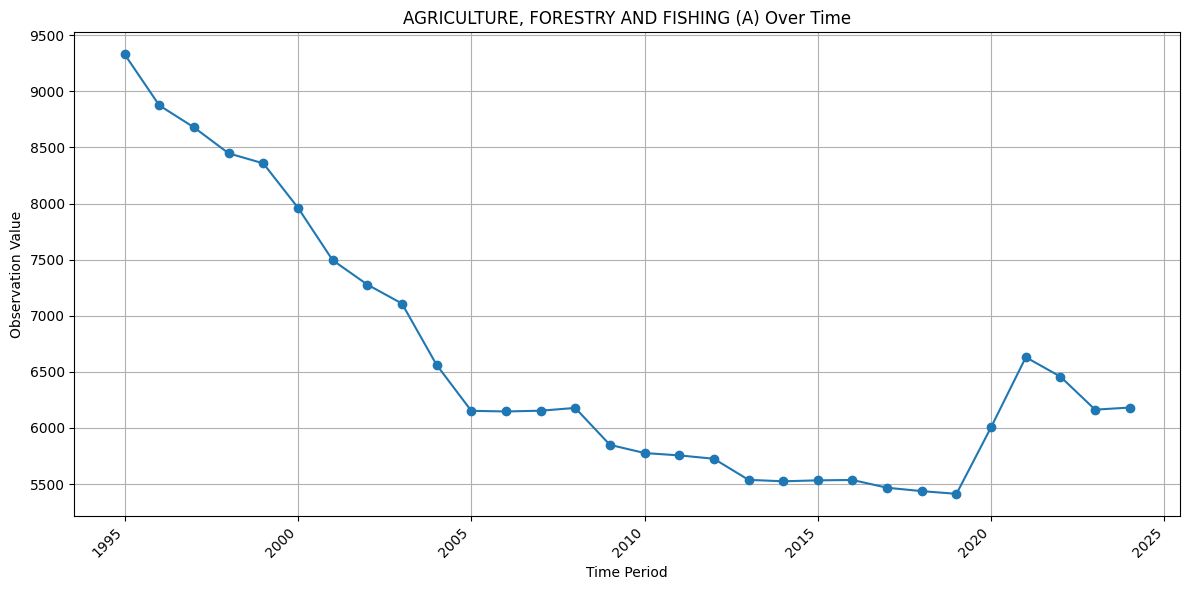

Plot saved for 'r002' (as 'Crop and animal production, hunting and related service activities (01)') as graphs/r002.png


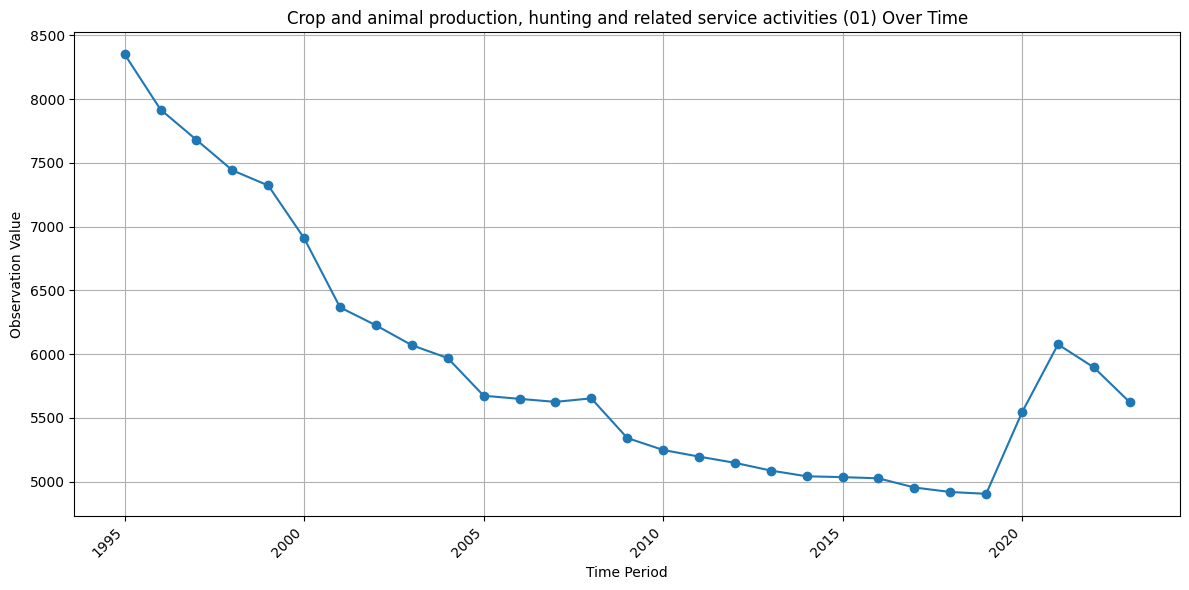

Plot saved for 'r003' (as 'Forestry and logging (02)') as graphs/r003.png


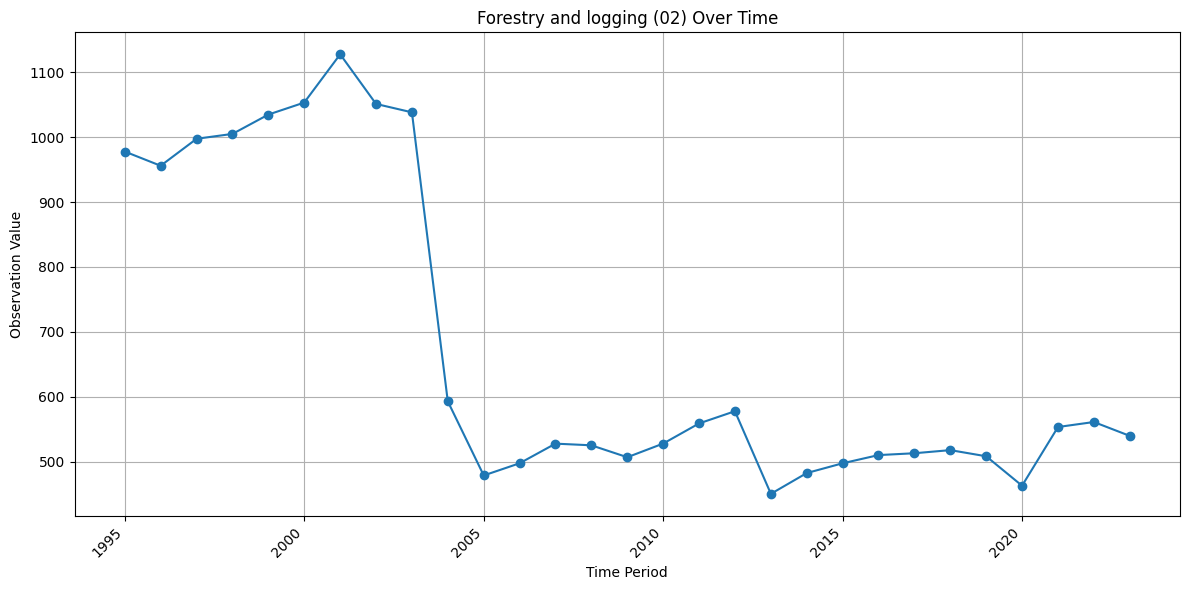

Plot saved for 'r004' (as 'Fishing and aquaculture (03)') as graphs/r004.png


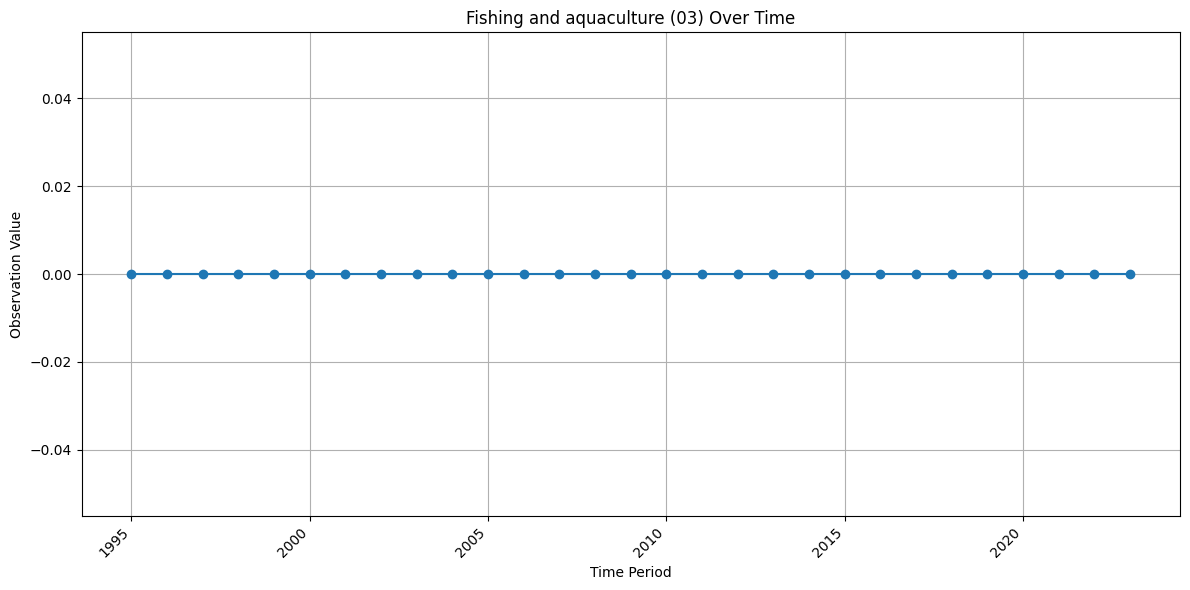

Plot saved for 'r005' (as 'MINING AND QUARRYING (B)') as graphs/r005.png


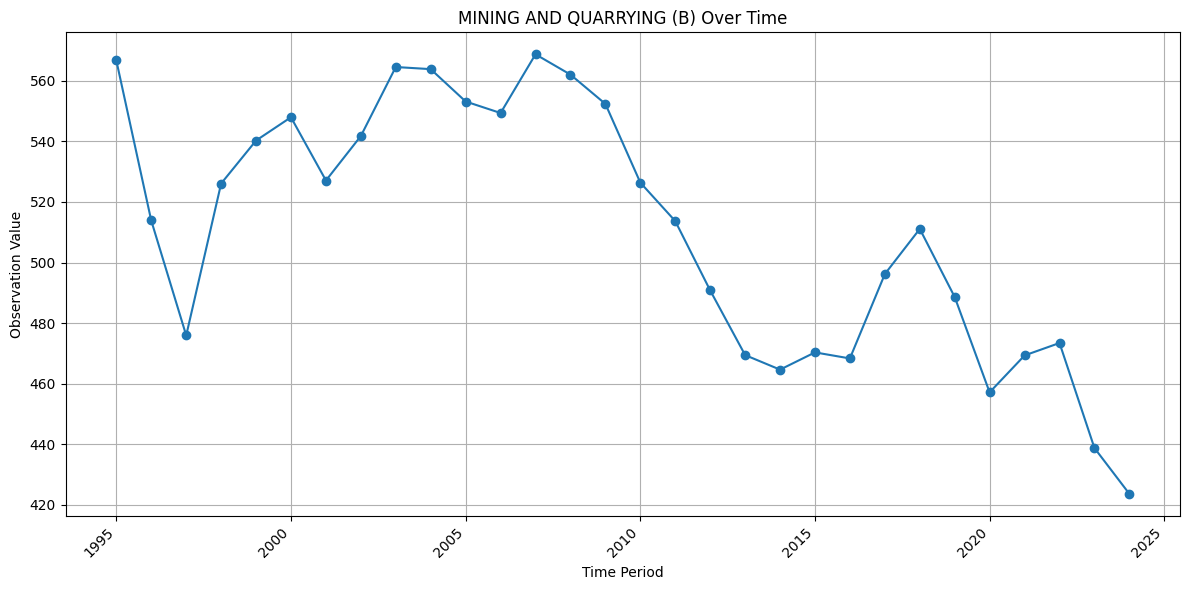

Plot saved for 'r011' (as 'MANUFACTURING (C)') as graphs/r011.png


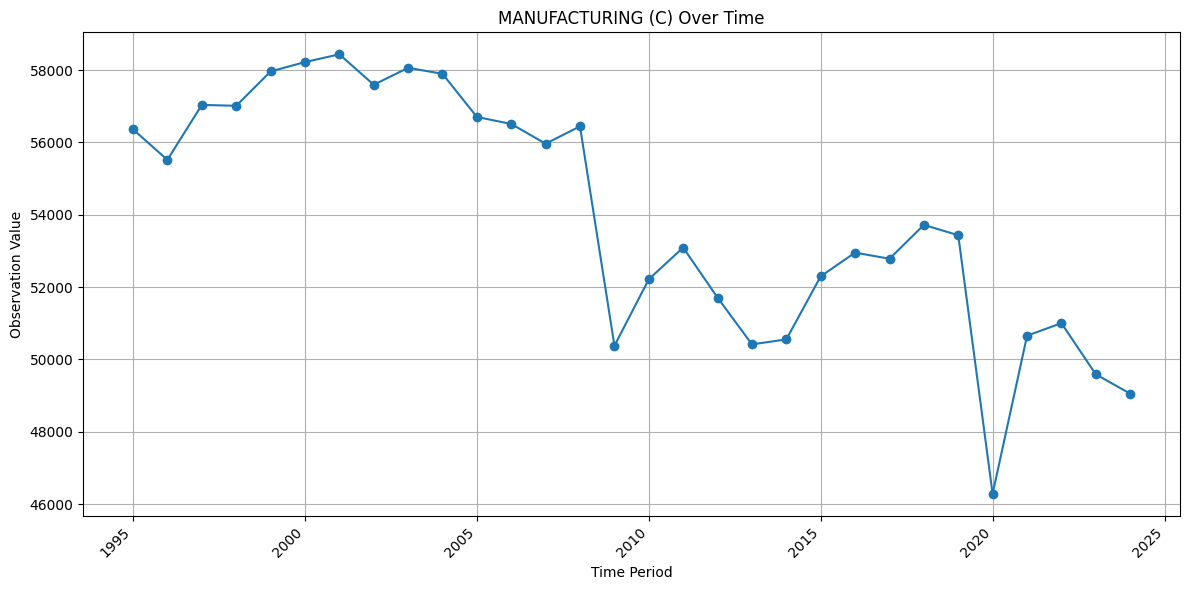

Plot saved for 'r036' (as 'ELECTRICITY, GAS, STEAM AND AIR CONDITIONING SUPPLY (D)') as graphs/r036.png


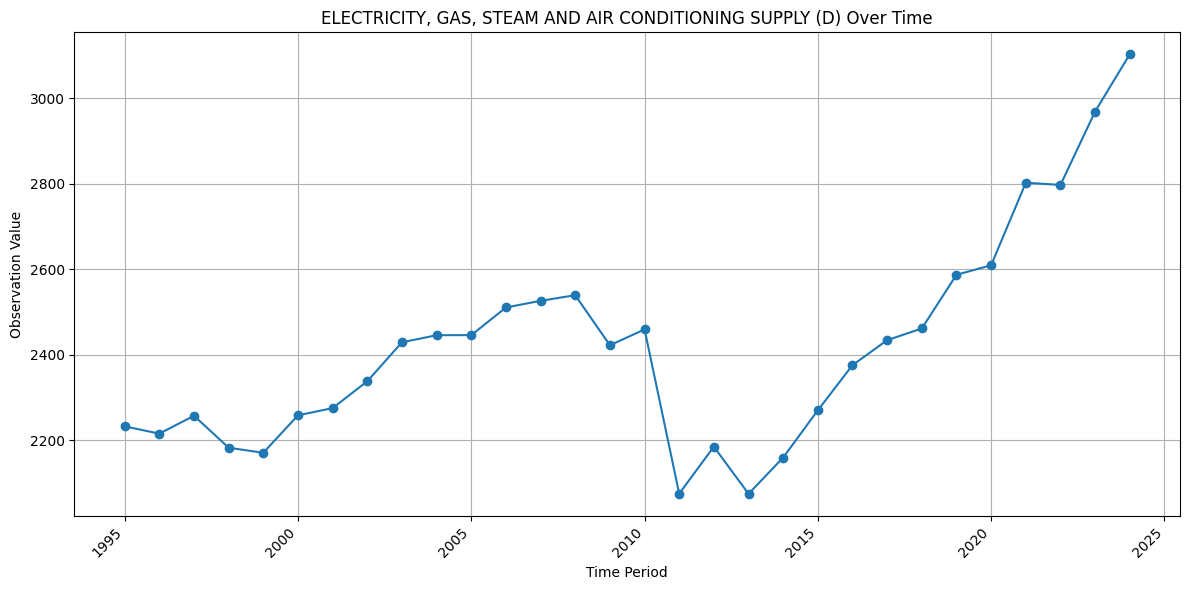

Plot saved for 'r038' (as 'WATER SUPPLY, SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES (E)') as graphs/r038.png


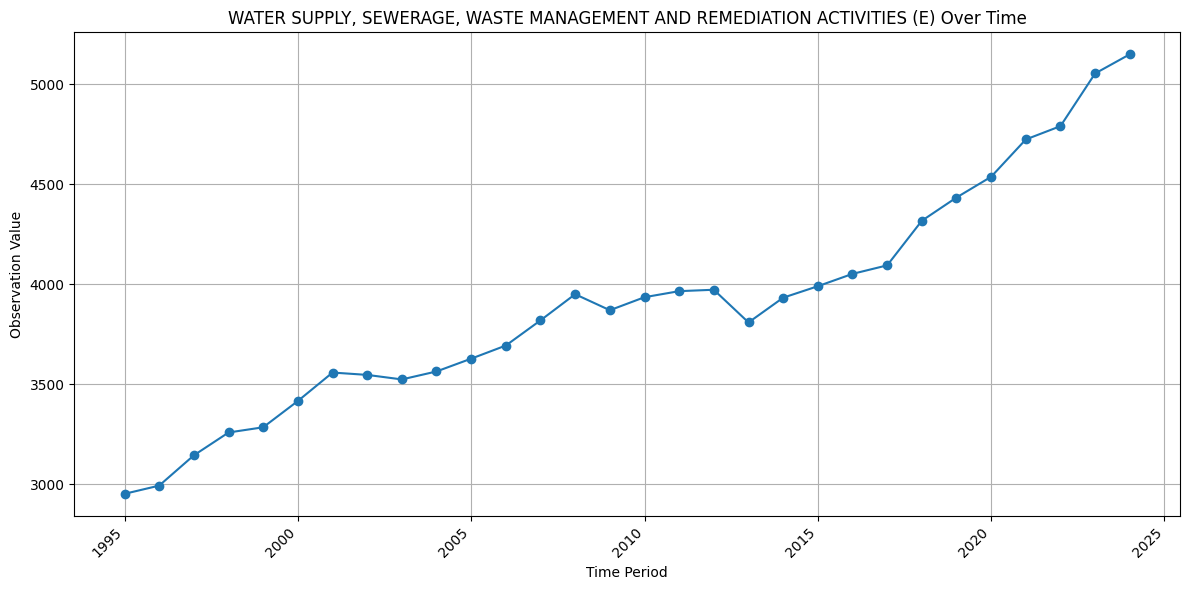

Plot saved for 'r039' (as 'Water collection, treatment and supply (36)') as graphs/r039.png


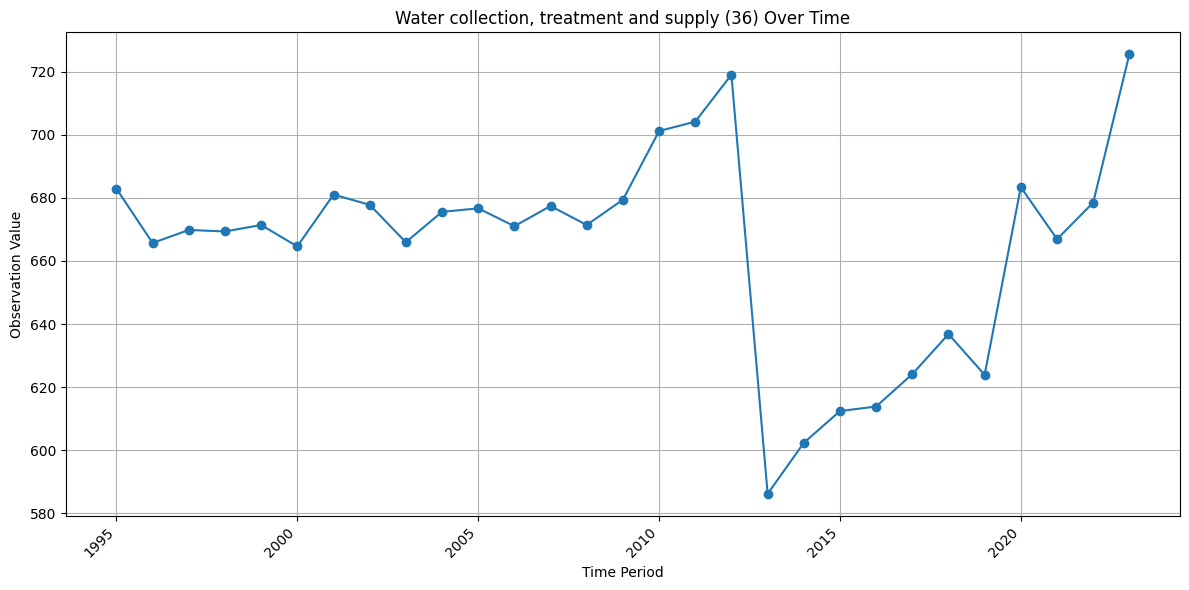

Plot saved for 'r040' (as 'Sewerage, waste collection, treatment and disposal activities, materials recovery, remediation activities and other waste management services (37_39)') as graphs/r040.png


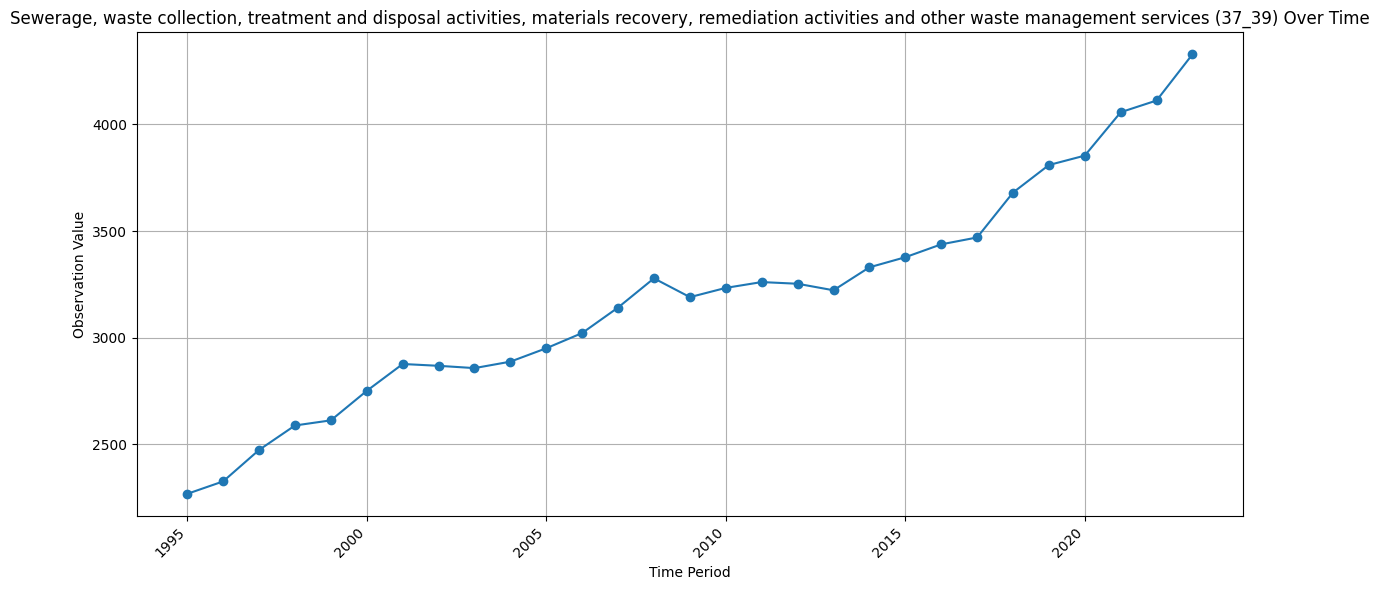

Plot saved for 'r043' (as 'CONSTRUCTION (F)') as graphs/r043.png


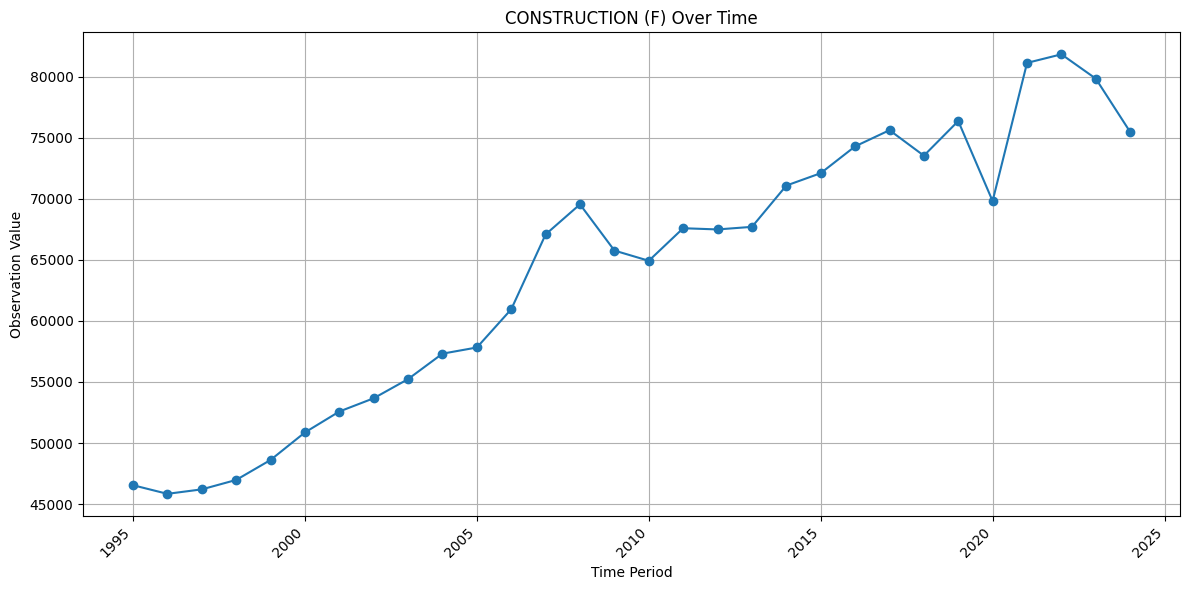

Plot saved for 'r047' (as 'WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES (G)') as graphs/r047.png


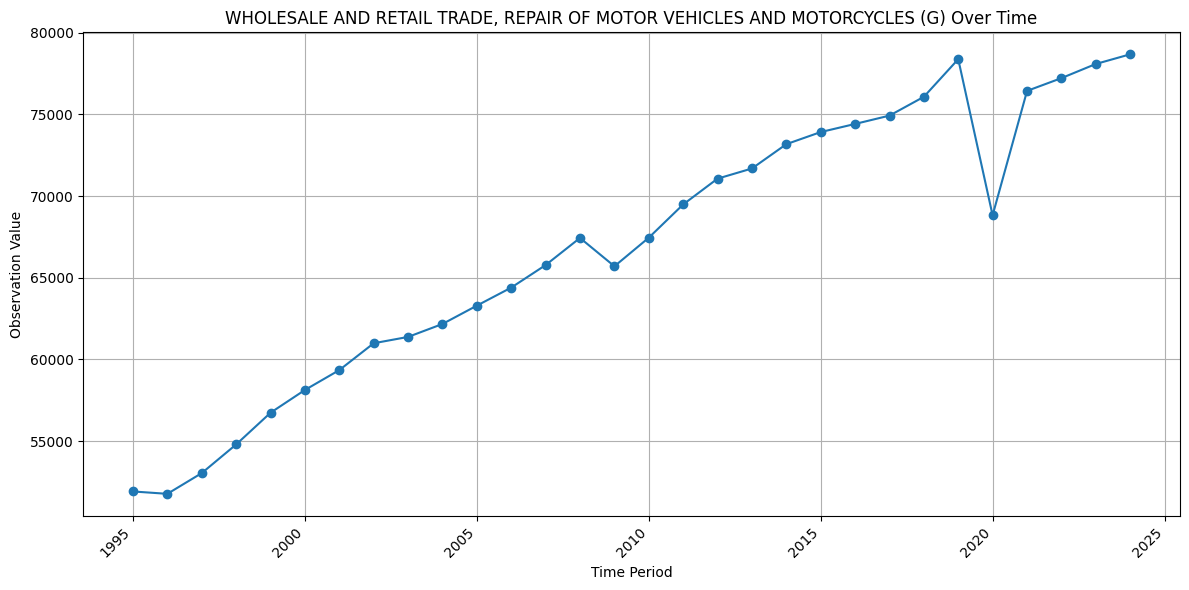

Plot saved for 'r051' (as 'TRANSPORTATION AND STORAGE (H)') as graphs/r051.png


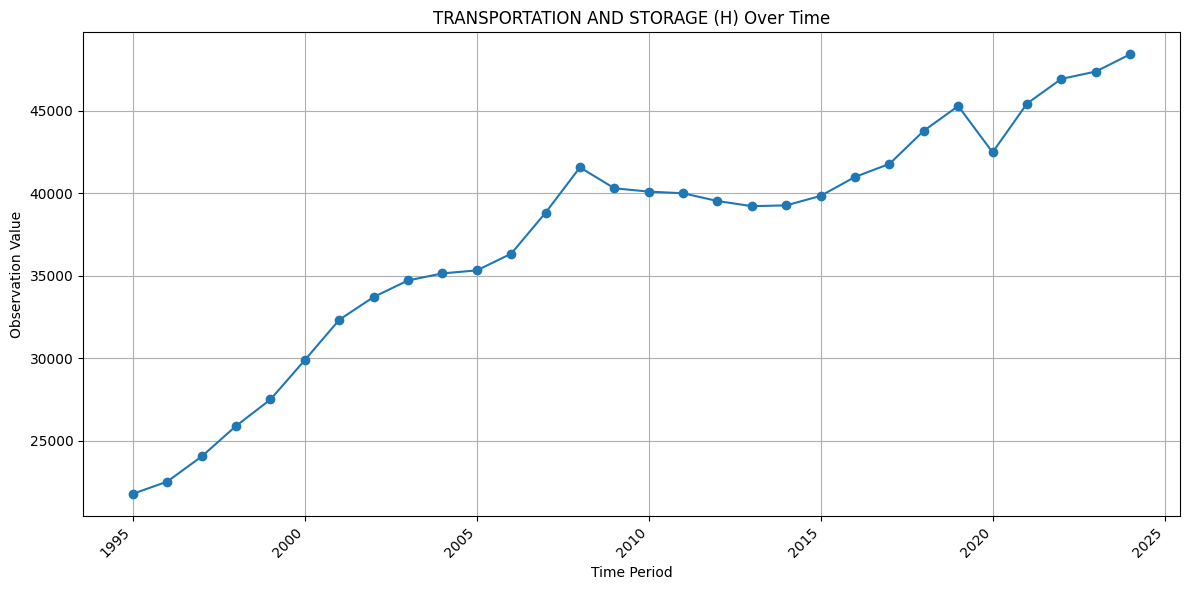

Plot saved for 'r057' (as 'ACCOMMODATION AND FOOD SERVICE ACTIVITIES (I)') as graphs/r057.png


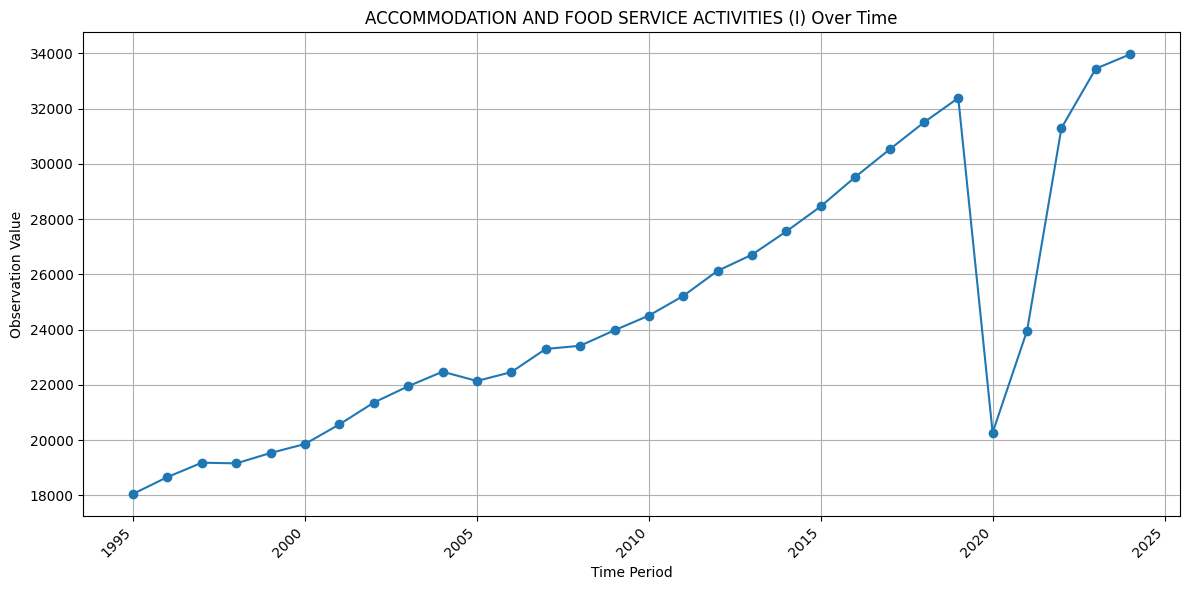

Plot saved for 'r060' (as 'INFORMATION AND COMMUNICATION (J)') as graphs/r060.png


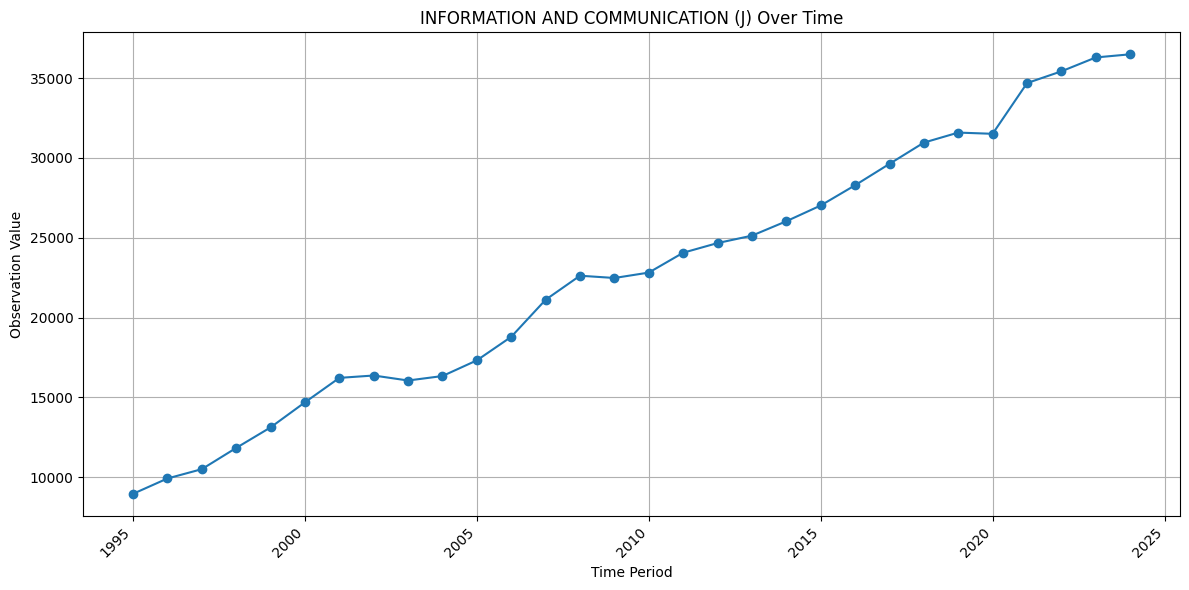

Plot saved for 'r067' (as 'FINANCIAL AND INSURANCE ACTIVITIES (K)') as graphs/r067.png


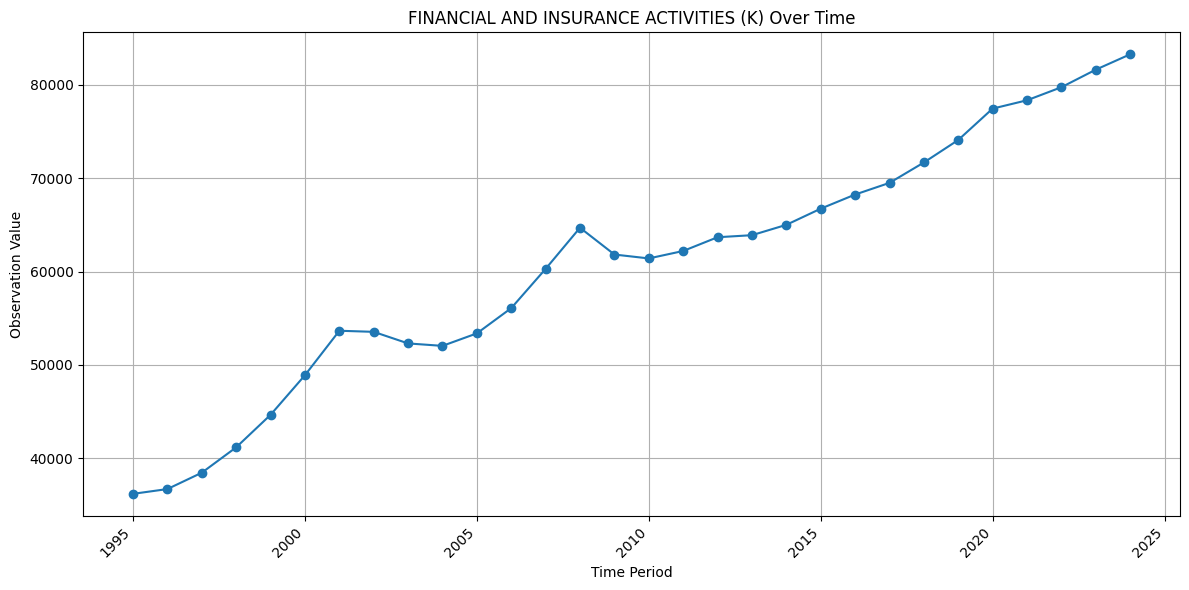

Plot saved for 'r068' (as 'Financial service activities, except insurance and pension funding (64)') as graphs/r068.png


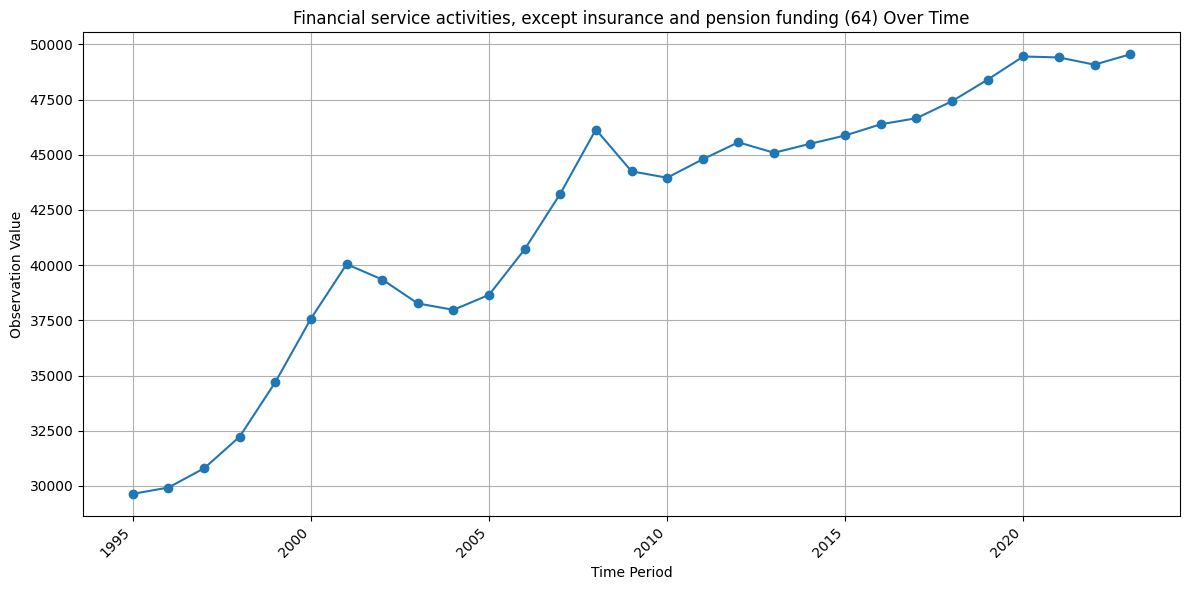

Plot saved for 'r069' (as 'Insurance, reinsurance and pension funding, except compulsory social security (65)') as graphs/r069.png


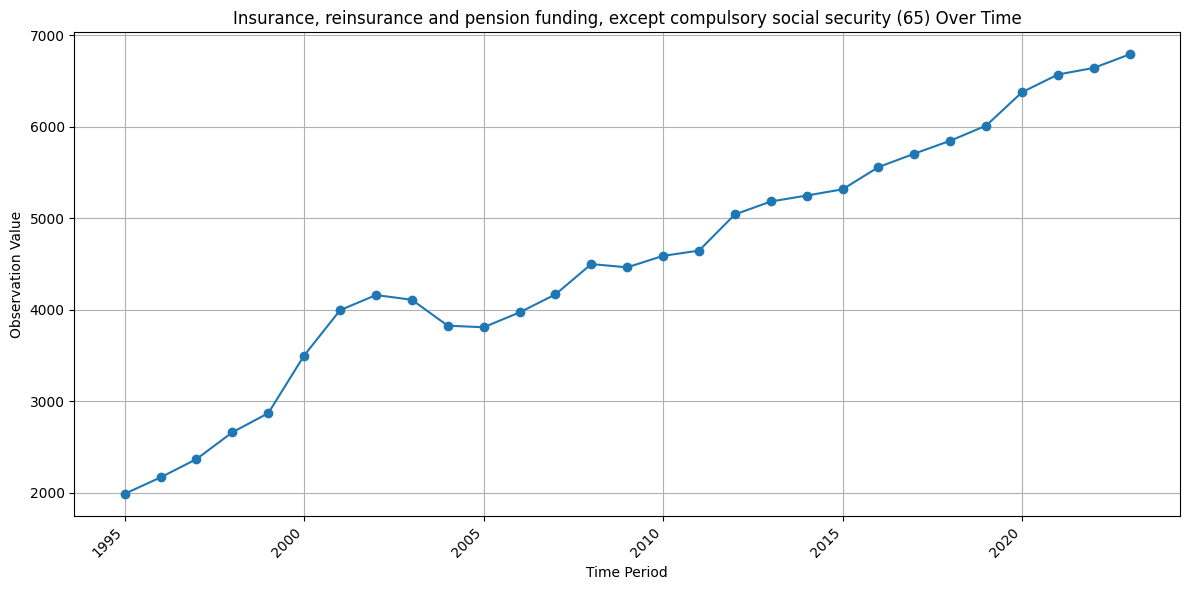

Plot saved for 'r070' (as 'Activities auxiliary to financial services and insurance activities (66)') as graphs/r070.png


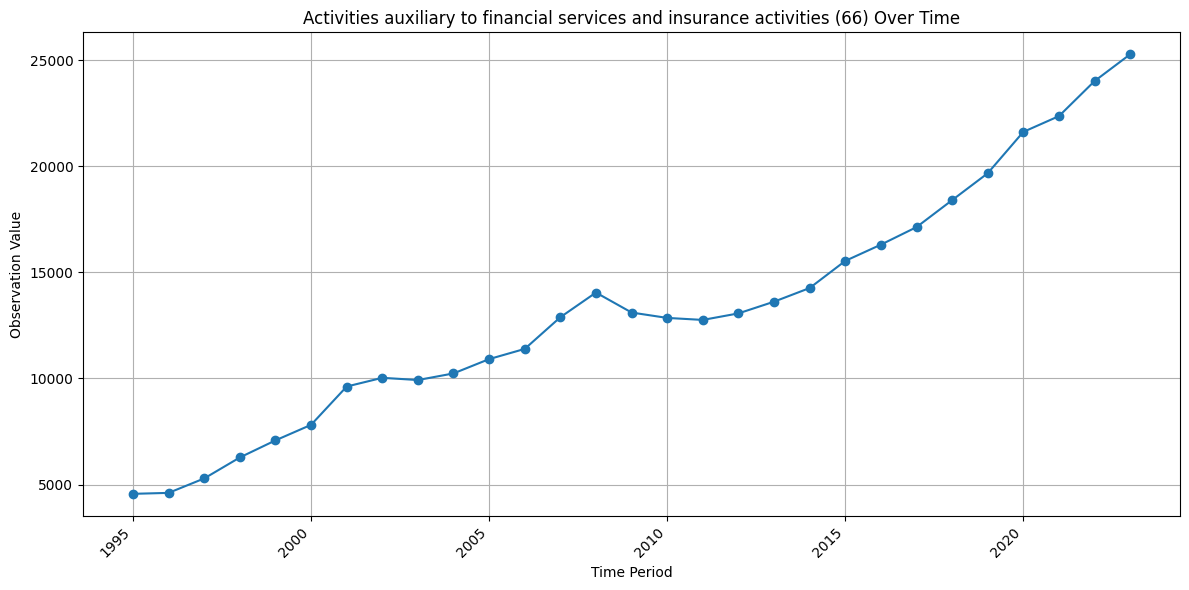

Plot saved for 'r071' (as 'REAL ESTATE ACTIVITIES (L)') as graphs/r071.png


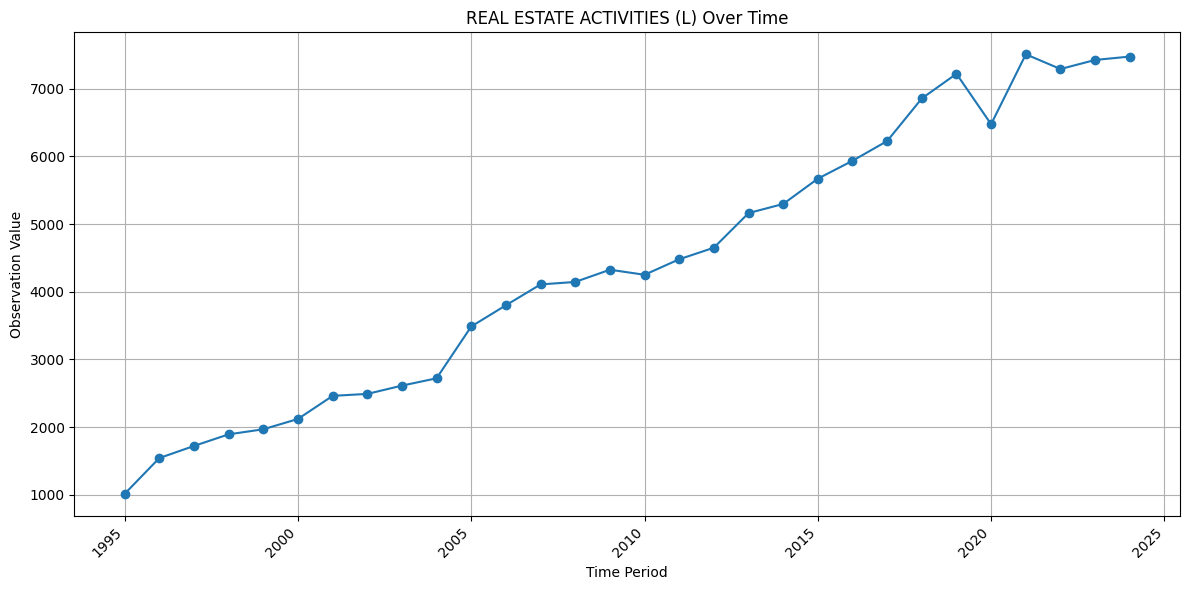

Plot saved for 'r073' (as 'PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES (M)') as graphs/r073.png


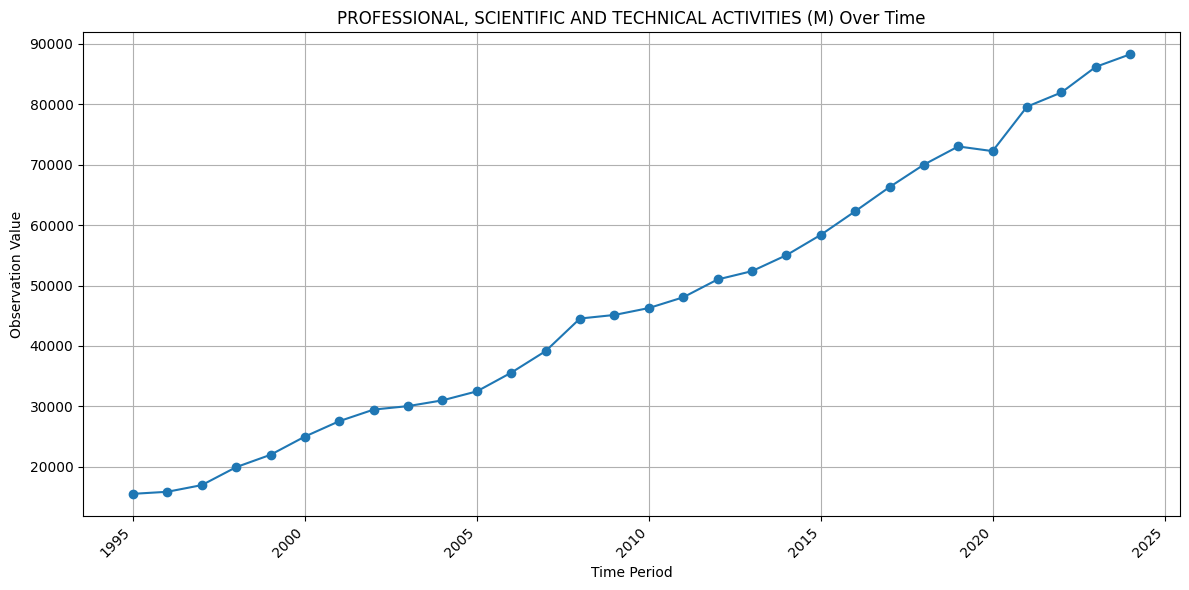

Plot saved for 'r081' (as 'ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES (N)') as graphs/r081.png


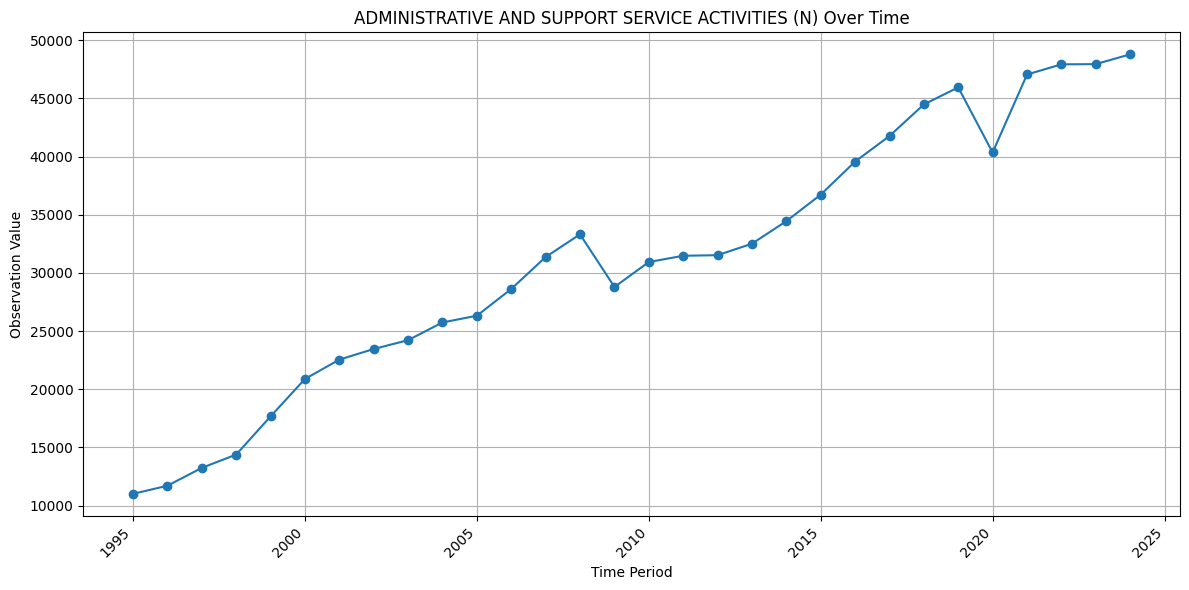

Plot saved for 'r085' (as 'Security and investigation activities, services to buildings and landscape activities, office administrative, office support and other business support activities (80_82)') as graphs/r085.png


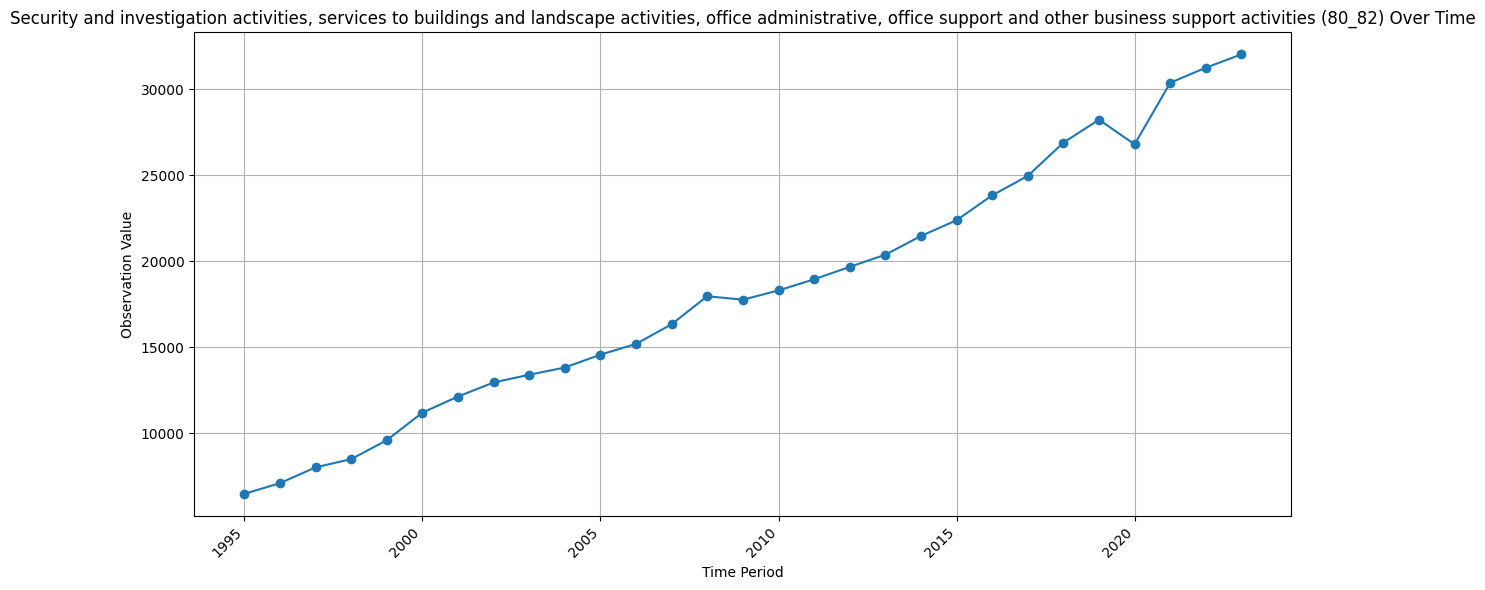

Plot saved for 'r088' (as 'PUBLIC ADMINISTRATION AND DEFENCE, COMPULSORY SOCIAL SECURITY (O)') as graphs/r088.png


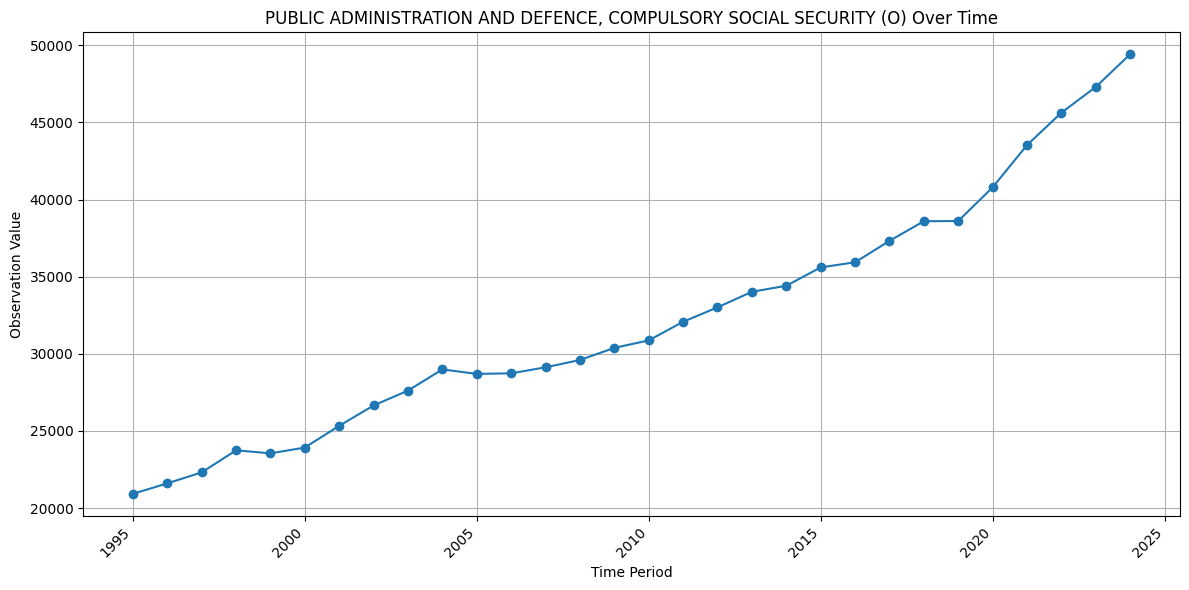

Plot saved for 'r090' (as 'EDUCATION (P)') as graphs/r090.png


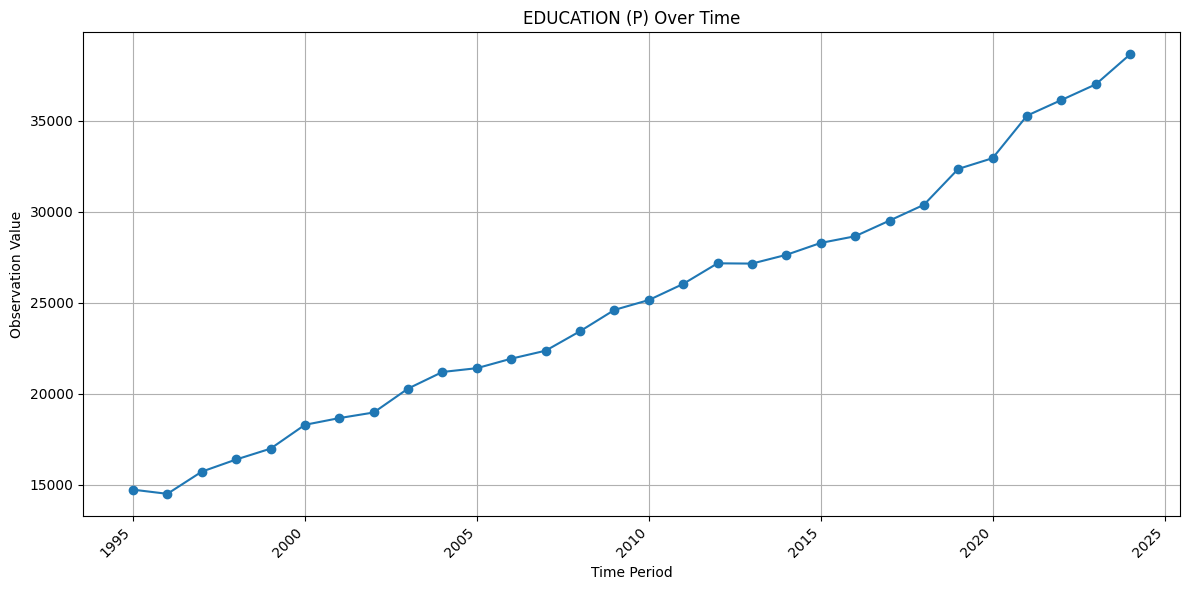

Plot saved for 'r092' (as 'HUMAN HEALTH AND SOCIAL WORK ACTIVITIES (Q)') as graphs/r092.png


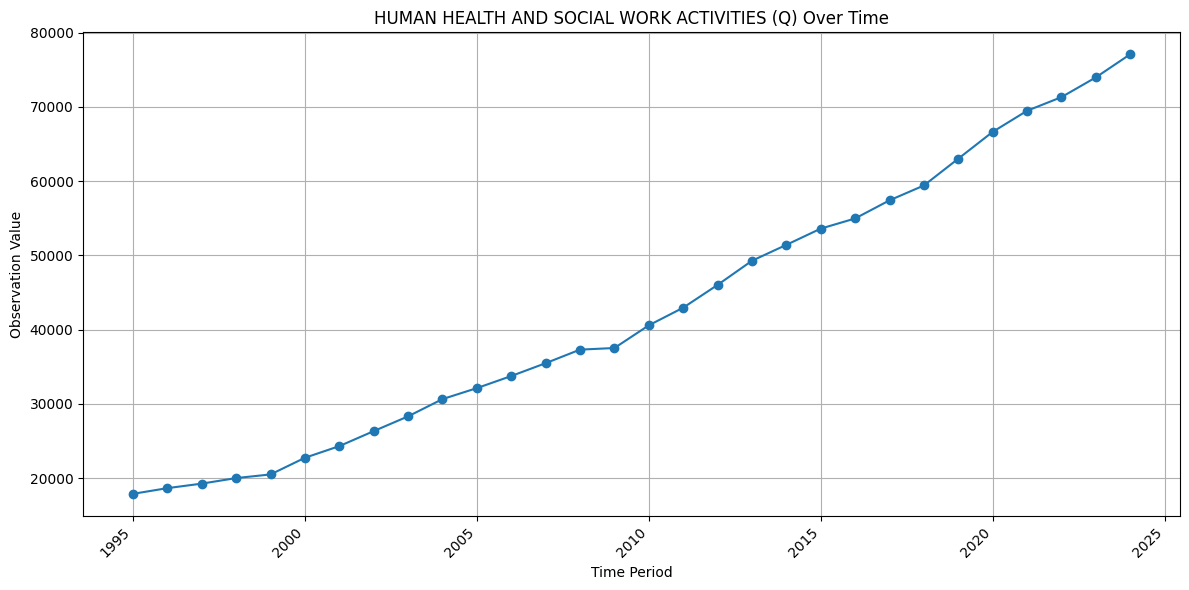

Plot saved for 'r093' (as 'Human health activities (86)') as graphs/r093.png


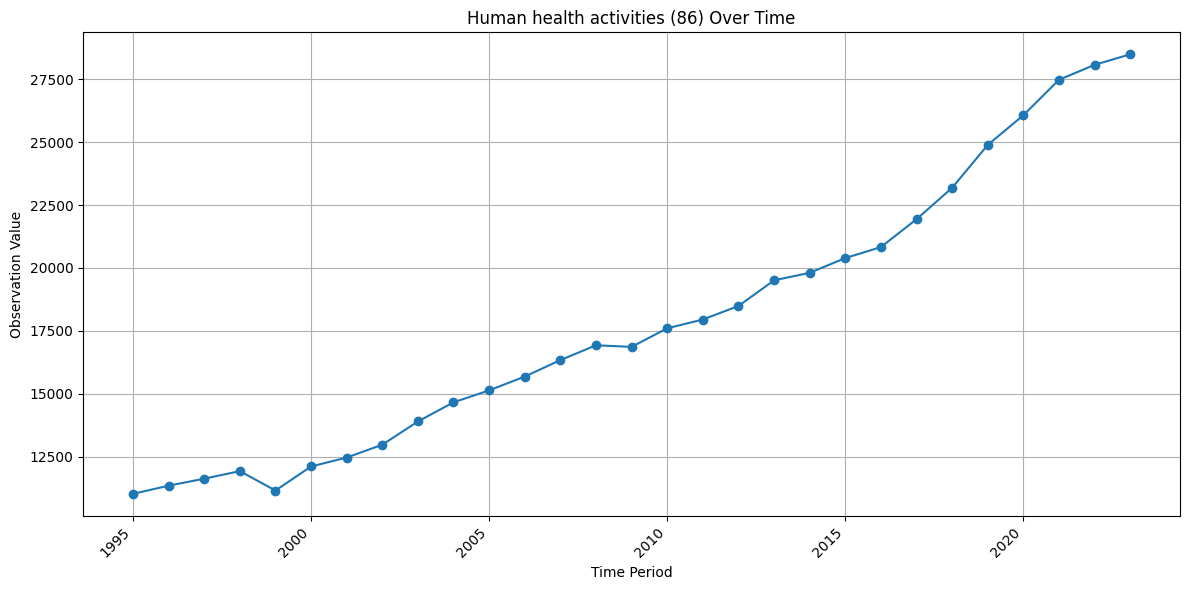

Plot saved for 'r094' (as 'Social work activities (87_88)') as graphs/r094.png


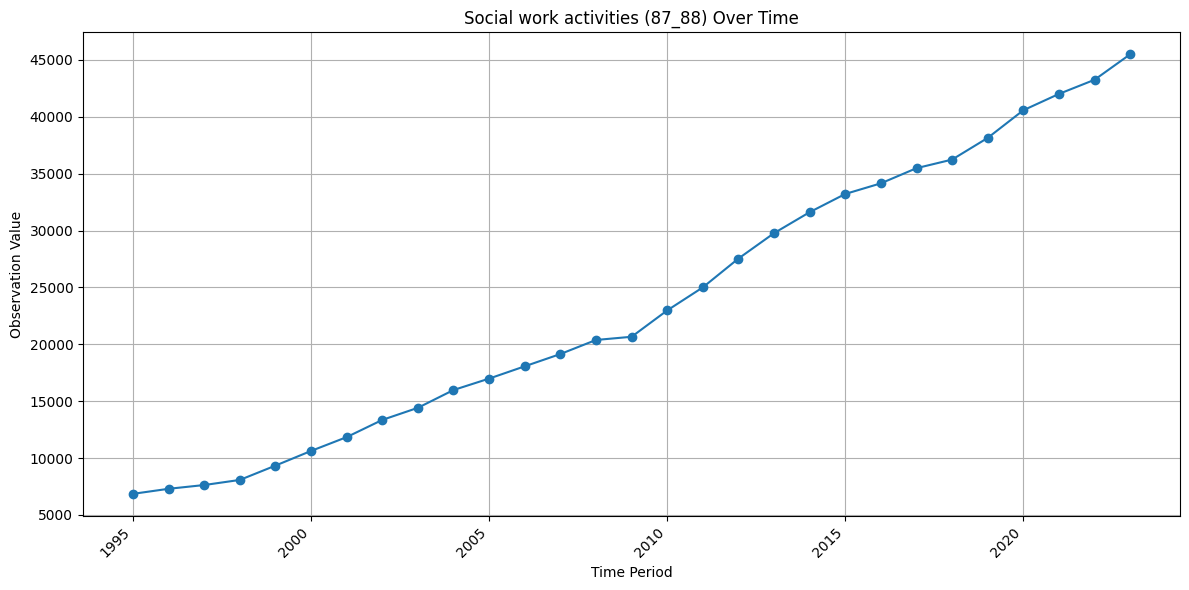

Plot saved for 'r096' (as 'ARTS, ENTERTAINMENT AND RECREATION (R)') as graphs/r096.png


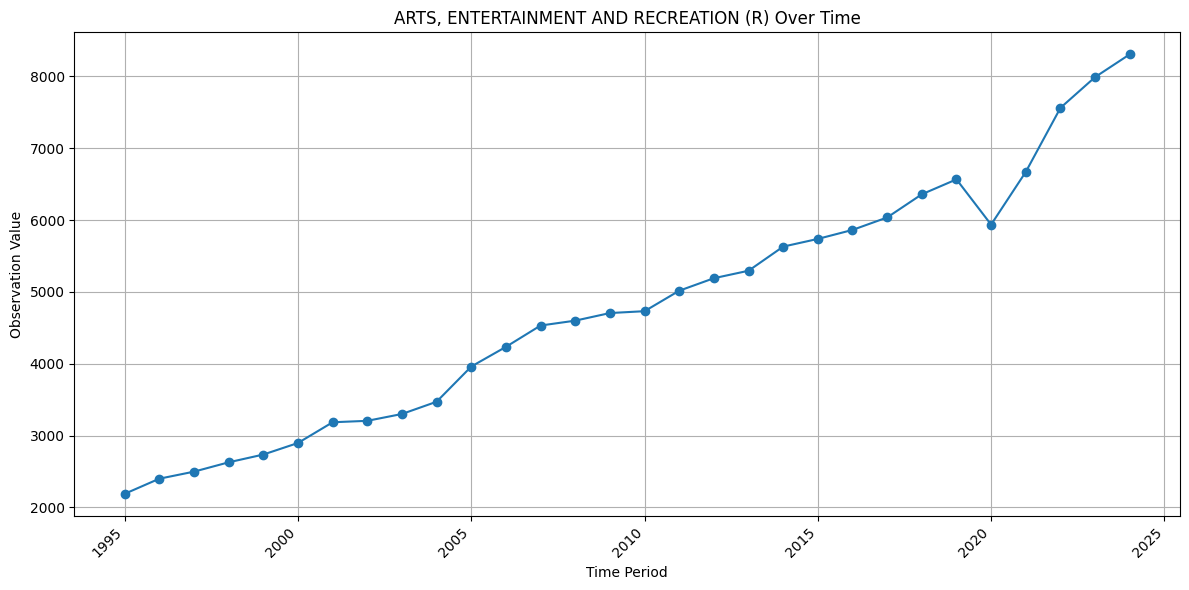

Plot saved for 'r097' (as 'Creative, arts and entertainment activities, libraries, archives, museums and other cultural activities, gambling and betting activities (90_92)') as graphs/r097.png


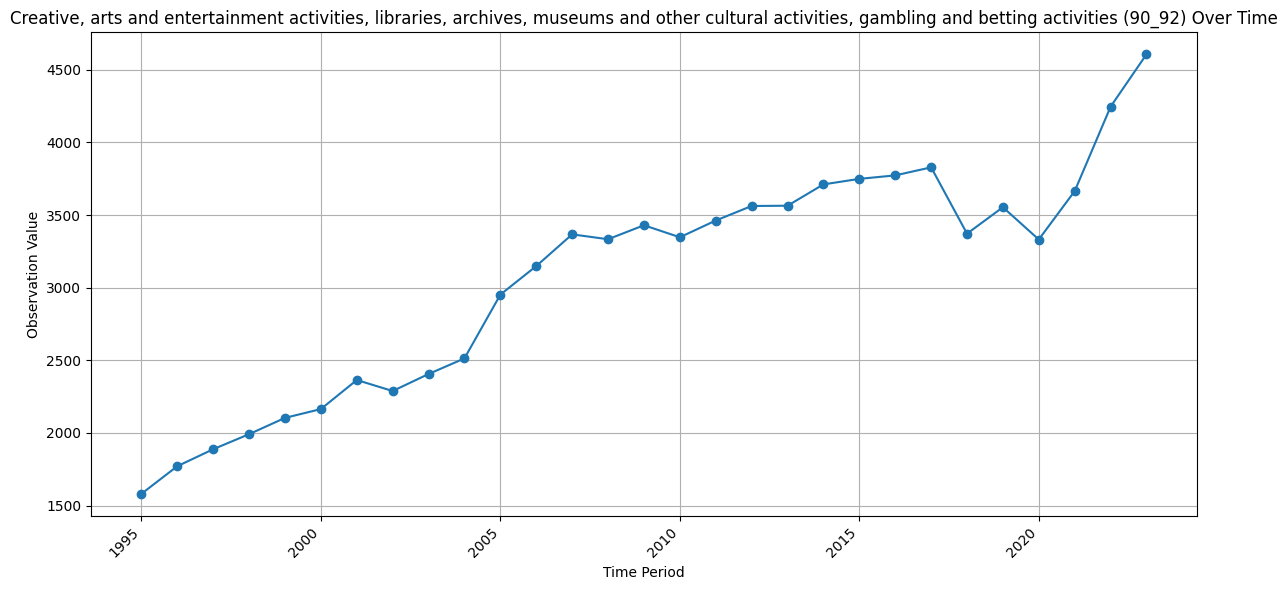

Plot saved for 'r100' (as 'Sports activities and amusement and recreation activities (93)') as graphs/r100.png


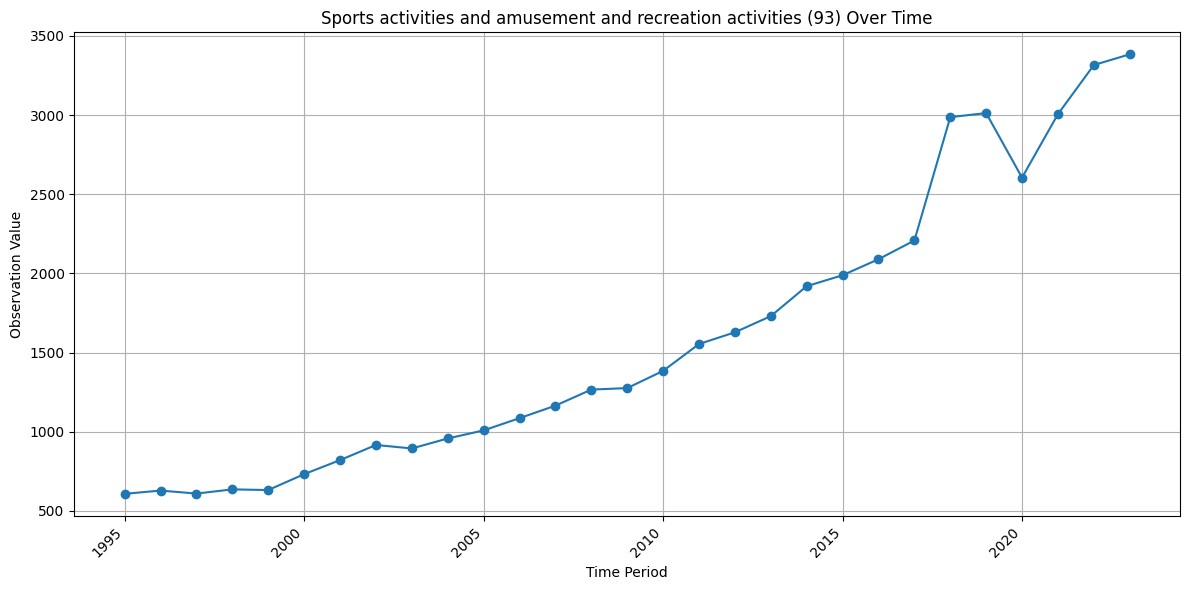

Plot saved for 'r101' (as 'OTHER SERVICE ACTIVITIES (S)') as graphs/r101.png


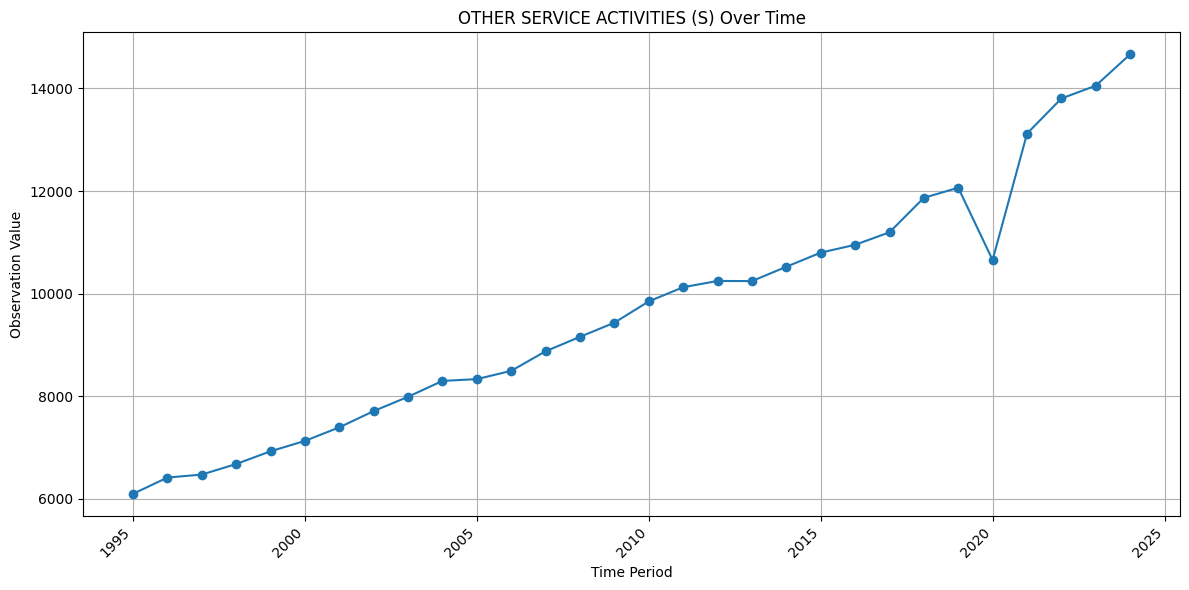

Plot saved for 'r102' (as 'Activities of membership organisations (94)') as graphs/r102.png


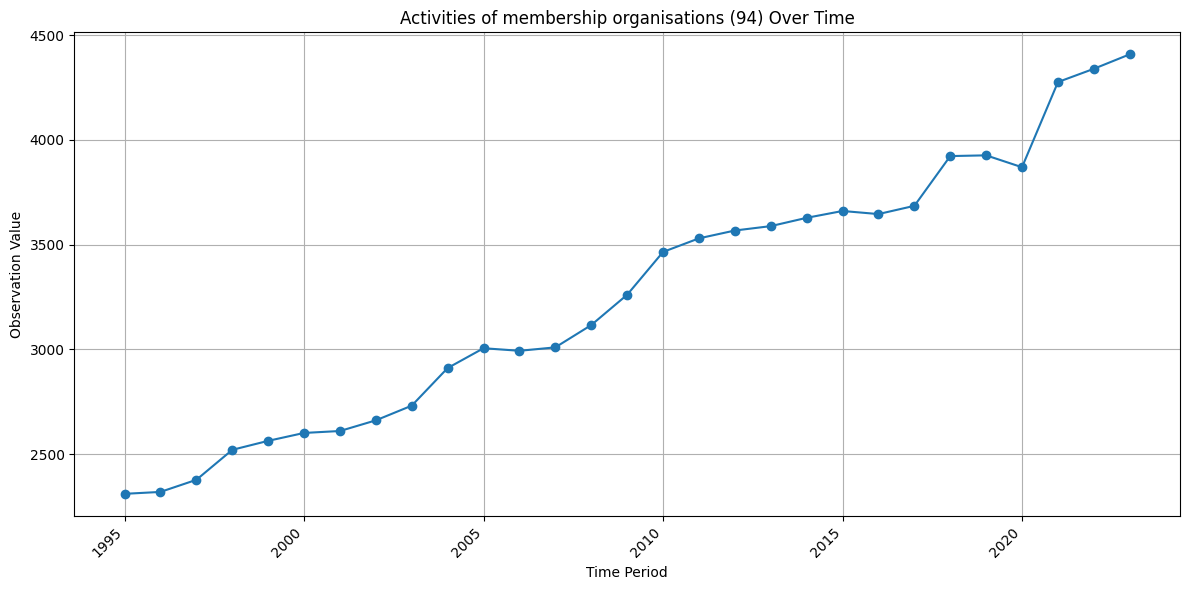

Plot saved for 'r103' (as 'Repair of computers and personal and household goods (95)') as graphs/r103.png


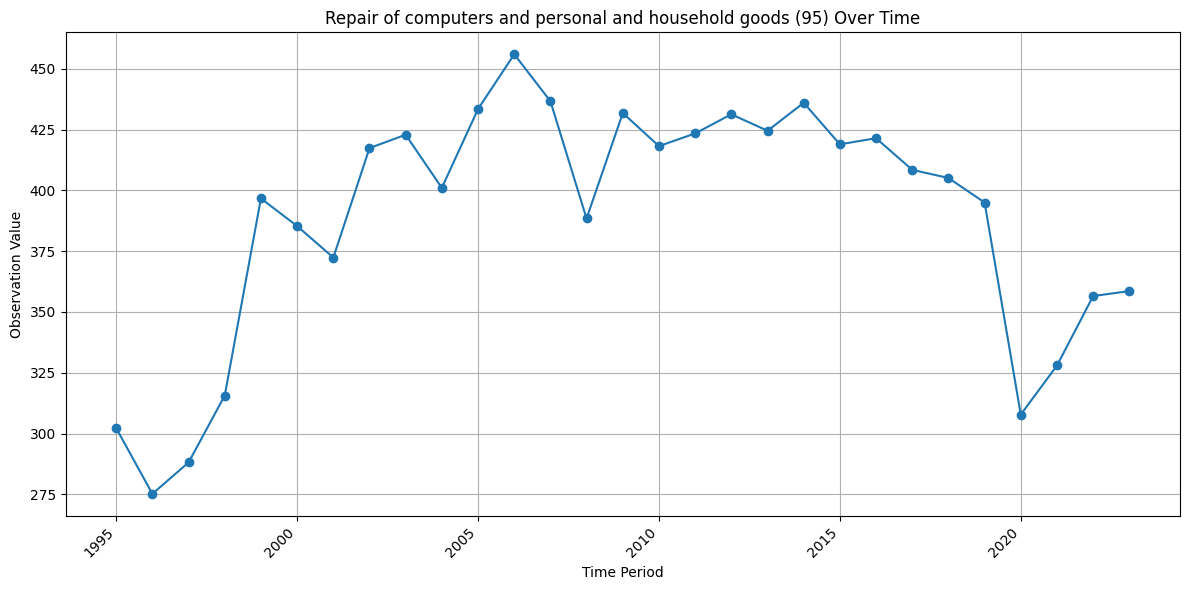

Plot saved for 'r104' (as 'Other personal service activities (96)') as graphs/r104.png


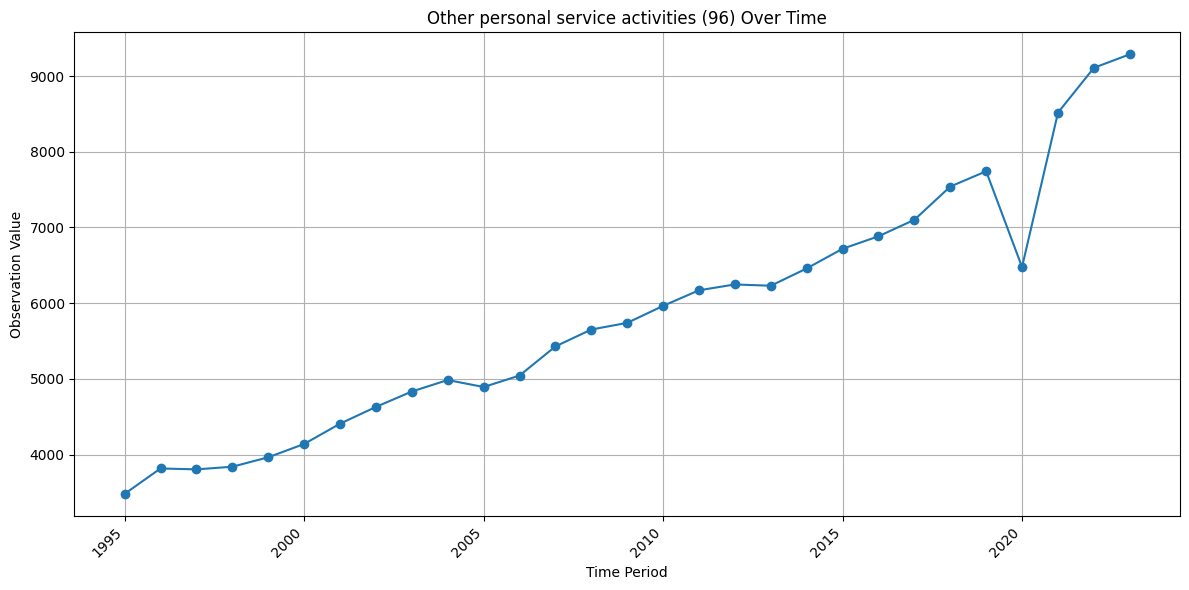

Plot saved for 'r105' (as 'ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS, UNDIFFERENTIATED GOODS- AND SERVICES-PRODUCING ACTIVITIES OF HOUSEHOLDS FOR OWN USE (T)') as graphs/r105.png


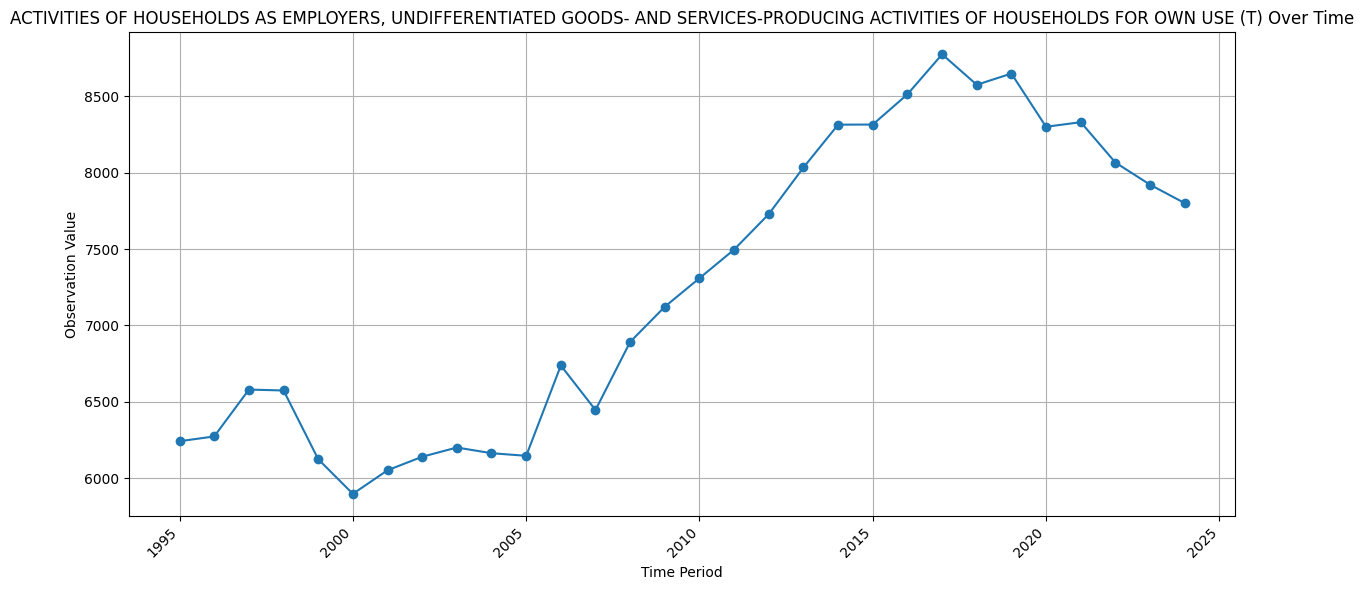

Plot saved for 'r108' (as 'ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS AND BODIES (U)') as graphs/r108.png


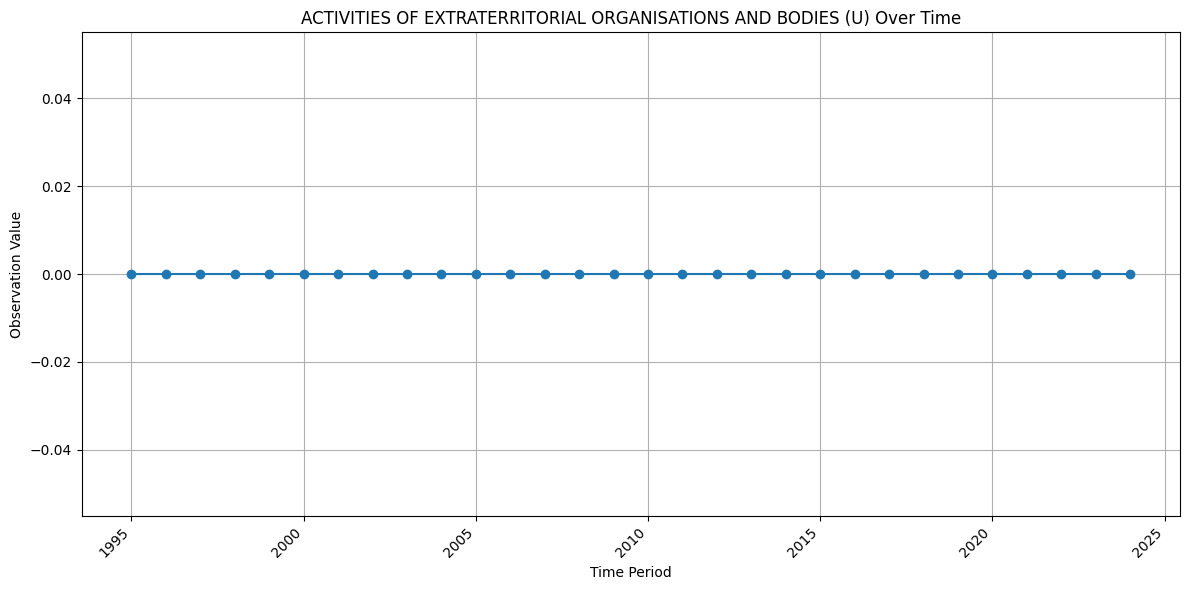

Plot saved for 'r121' (as 'TOTAL ACTIVITIES (TOT)') as graphs/r121.png


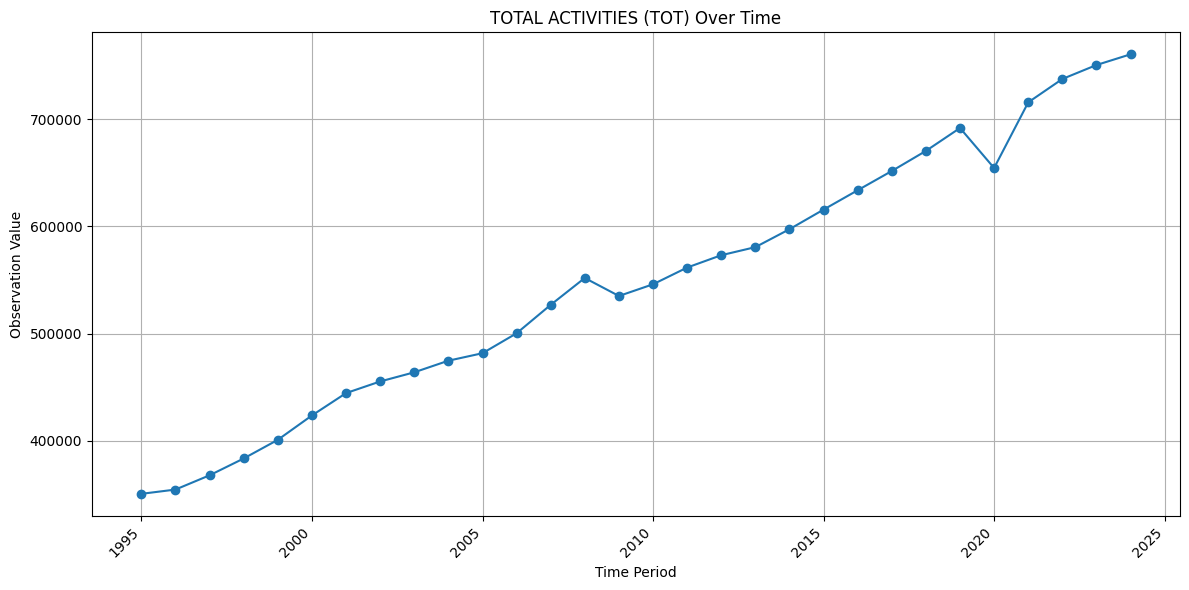


Data processing and plotting complete.


In [23]:
import csv
import matplotlib.pyplot as plt
import os
from datetime import datetime
import re # Import regex module for sanitizing filenames
import matplotlib.dates as mdates # Import for date formatting

# Define the path to your CSV file
csv_file_path = '../data/LU1,DF_E2312,1.0+all.csv'

# --- Variable Label to Description Mapping ---
# This dictionary maps your short labels to their full descriptions.
# I've constructed this from the table you provided previously.
label_to_description = {
    'r001': 'AGRICULTURE, FORESTRY AND FISHING (A)',
    'r002': 'Crop and animal production, hunting and related service activities (01)',
    'r003': 'Forestry and logging (02)',
    'r004': 'Fishing and aquaculture (03)',
    'r005': 'MINING AND QUARRYING (B)',
    'r011': 'MANUFACTURING (C)',
    'r036': 'ELECTRICITY, GAS, STEAM AND AIR CONDITIONING SUPPLY (D)',
    'r038': 'WATER SUPPLY, SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES (E)',
    'r039': 'Water collection, treatment and supply (36)',
    'r040': 'Sewerage, waste collection, treatment and disposal activities, materials recovery, remediation activities and other waste management services (37_39)',
    'r043': 'CONSTRUCTION (F)',
    'r047': 'WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES (G)',
    'r051': 'TRANSPORTATION AND STORAGE (H)',
    'r057': 'ACCOMMODATION AND FOOD SERVICE ACTIVITIES (I)',
    'r060': 'INFORMATION AND COMMUNICATION (J)',
    'r067': 'FINANCIAL AND INSURANCE ACTIVITIES (K)',
    'r068': 'Financial service activities, except insurance and pension funding (64)',
    'r069': 'Insurance, reinsurance and pension funding, except compulsory social security (65)',
    'r070': 'Activities auxiliary to financial services and insurance activities (66)',
    'r071': 'REAL ESTATE ACTIVITIES (L)',
    'r073': 'PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES (M)',
    'r081': 'ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES (N)',
    'r085': 'Security and investigation activities, services to buildings and landscape activities, office administrative, office support and other business support activities (80_82)',
    'r088': 'PUBLIC ADMINISTRATION AND DEFENCE, COMPULSORY SOCIAL SECURITY (O)',
    'r090': 'EDUCATION (P)',
    'r092': 'HUMAN HEALTH AND SOCIAL WORK ACTIVITIES (Q)',
    'r093': 'Human health activities (86)',
    'r094': 'Social work activities (87_88)',
    'r096': 'ARTS, ENTERTAINMENT AND RECREATION (R)',
    'r097': 'Creative, arts and entertainment activities, libraries, archives, museums and other cultural activities, gambling and betting activities (90_92)',
    'r100': 'Sports activities and amusement and recreation activities (93)',
    'r101': 'OTHER SERVICE ACTIVITIES (S)',
    'r102': 'Activities of membership organisations (94)',
    'r103': 'Repair of computers and personal and household goods (95)',
    'r104': 'Other personal service activities (96)',
    'r105': 'ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS, UNDIFFERENTIATED GOODS- AND SERVICES-PRODUCING ACTIVITIES OF HOUSEHOLDS FOR OWN USE (T)',
    'r108': 'ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS AND BODIES (U)',
    'r121': 'TOTAL ACTIVITIES (TOT)'
}

# --- Data Import and Initial Inspection ---

def load_and_inspect_data_no_pandas(path):
    """
    Loads a CSV file into a list of dictionaries.

    Args:
        path (str): The file path to the CSV.

    Returns:
        list: A list of dictionaries, where each dictionary is a row.
    """
    if not os.path.exists(path):
        print(f"Error: The file '{path}' does not exist.")
        return None

    data = []
    try:
        with open(path, mode='r', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                data.append(row)
        print(f"CSV file '{path}' loaded successfully!\n")

        return data
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return None

# Load your data
data = load_and_inspect_data_no_pandas(csv_file_path)

if data is not None:
    # --- Data Cleaning and Preparation ---

    # Column mapping based on your testdata.csv structure
    # 'LABELS' column holds the variable names
    column_mapping = {
        'TIME_PERIOD': 'Time_Period',
        'OBS_VALUE': 'OBS_VALUE',
        'LABELS': 'Series_Label'
    }

    cleaned_data = []
    for row in data:
        new_row = {}
        for old_key, new_key in column_mapping.items():
            new_row[new_key] = row.get(old_key)
        # Copy any other original keys not explicitly mapped
        for original_key in row.keys():
            if original_key not in column_mapping.keys() and original_key not in new_row:
                new_row[original_key] = row[original_key]

        # Convert 'TIME_PERIOD' to datetime objects (assuming 'YYYY' format)
        time_period_str = new_row.get('Time_Period')
        if time_period_str:
            try:
                # Ensure it's a 4-digit year string
                if re.fullmatch(r'\d{4}', time_period_str):
                    new_row['Time_Period_dt'] = datetime.strptime(time_period_str, "%Y")
                else:
                    new_row['Time_Period_dt'] = None # Handle unexpected date formats
            except ValueError:
                new_row['Time_Period_dt'] = None
        else:
            new_row['Time_Period_dt'] = None

        # Convert 'OBS_VALUE' to numeric
        obs_value_str = new_row.get('OBS_VALUE')
        if obs_value_str:
            try:
                new_row['OBS_VALUE_numeric'] = float(obs_value_str)
            except ValueError:
                new_row['OBS_VALUE_numeric'] = None
        else:
            new_row['OBS_VALUE_numeric'] = None

        cleaned_data.append(new_row)

    # Filter out rows where essential data (numeric value or time) is missing
    cleaned_data = [
        row for row in cleaned_data
        if row.get('OBS_VALUE_numeric') is not None and row.get('Time_Period_dt') is not None
    ]

    print("\n--- Cleaned Data Info ---")
    if not cleaned_data:
        print("No cleaned data to display info for.")
    else:
        print(f"Total rows after cleaning: {len(cleaned_data)}")

    # --- Extract and Print Variables (Series_Label) ---
    unique_variables = sorted(list(set(row.get('Series_Label') for row in cleaned_data if row.get('Series_Label'))))

    print("\n--- List of Variables in the CSV File ---")
    if unique_variables:
        for var in unique_variables:
            print(f"- {var}")
    else:
        print("No variables found in the 'LABELS' column after processing.")

    # --- Plot each single variable and save ---

    # Create the output directory for plots if it doesn't exist
    output_dir = 'graphs' # As per your code, still 'graphs'
    os.makedirs(output_dir, exist_ok=True)
    print(f"\nEnsured output directory '{output_dir}' exists for plots.")

    print("\n--- Generating Plots for Each Variable ---")

    for variable_name in unique_variables:
        # Get the descriptive name for the plot title, defaulting to the short name if not found
        plot_title_description = label_to_description.get(variable_name, variable_name)

        # Filter data for the current variable
        variable_data = [
            row for row in cleaned_data
            if row.get('Series_Label') == variable_name
        ]

        if variable_data:
            # Sort data by time period for correct plotting order
            variable_data.sort(key=lambda x: x['Time_Period_dt'])
            time_periods = [row['Time_Period_dt'] for row in variable_data]
            obs_values = [row['OBS_VALUE_numeric'] for row in variable_data]

            plt.figure(figsize=(12, 6))
            plt.plot(time_periods, obs_values, marker='o', linestyle='-')
            # Use the descriptive name for the plot title
            plt.title(f'{plot_title_description} Over Time')
            plt.xlabel('Time Period')
            plt.ylabel('Observation Value')
            plt.grid(True)

            # Improve x-axis tick formatting for annual data
            ax = plt.gca() # Get current axes
            ax.xaxis.set_major_locator(mdates.YearLocator(base=5)) # Show ticks every 5 years
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format as YYYY
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right") # Rotate labels for readability
            
            # Use tight_layout BEFORE saving
            plt.tight_layout() 

            # Sanitize variable name (short label) for filename - this remains unchanged
            sanitized_variable_name = re.sub(r'[^\w\s-]', '', variable_name).replace(' ', '_')
            filename = os.path.join(output_dir, f'{sanitized_variable_name}.png')
            plt.savefig(filename)
            print(f"Plot saved for '{variable_name}' (as '{plot_title_description}') as {filename}")
            
            # Removed plt.show() here as typically you just save in batch processing
            # If you want to see each plot, you can uncomment plt.show()
            plt.show() 
            plt.close() # Close the plot to free up memory
        else:
            print(f"No data to plot for variable: '{variable_name}'")

    print("\nData processing and plotting complete.")